<div style="border:solid steelblue 3px; padding: 20px">
<font size="4"><b>🍕 Пример комментария - совета, здесь м.б. просто ссылка</b></font>
    <br /> 
        <font size="3", color = "black">
<br />
    Тут всего такого разного и вкусного :), есть способы прокачать проект визуализациями (ценит большинство "боссов")  <br /><br />
        <a href="https://devpractice.ru/matplotlib-book/">“Библиотека Matplotlib” доступна для скачивания БЕСПЛАТНО!</a>
        На сайте много полезных материалов, мне самому очень помогло в свое время, до сих пор подсматриваю :)



# <font color='#22a9eb'> Исследование закономерностей успеха игр </font>

Для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
  
В наборе данных попадается аббревиатура <b>ESRB</b> (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. <b>ESRB</b> оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных:
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
     
Данные за 2016 год могут быть неполными.

<div class="alert alert-info">
 
Сформулируем план работ и перечень основных задач:

<ol>
<b>Провести общий анализ данных.</b>
    <li>Общая информация о датафрейме;</li>
    <li>Первые строки таблицы;</li>
    <li>Гистограммы по данным во фрейме;</li>
    <li>Предварительный вывод.</li>
<b>Предобработка данных.</b>
    <li>Проверить имена столбцов;</li>
    <li>Проанализировать пропущенные значения и дубликаты;</li>
    <li>Скорректировать типы данных;</li>
    <li>Вычислить суммарные продажи для всех регионов.</li>
<b>Исследовательский анализ данных.</b>
    <li>Распределение игр по годам и выбор актуального периода;</li>
    <li>Распределение продаж по платформам за всё время и актуальный период;</li>
    <li>Ящики с усами за весь период и анализ с актуальным;</li>
    <li>Анализ наиболее популярной платформы и распределение игр по жанрам;</li>
    <li>Портрет пользователя каждого региона.</li>
<b>Общий вывод.</b>
</ol

## <font color='#22a9eb'> Общая информация о данных </font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/home/dwpsd/Dev/ds_practicum_projects/datasets/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

Выведем первые 20 строк датафрейма.

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Общая информация о датафрейме:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Построим гистограммы:

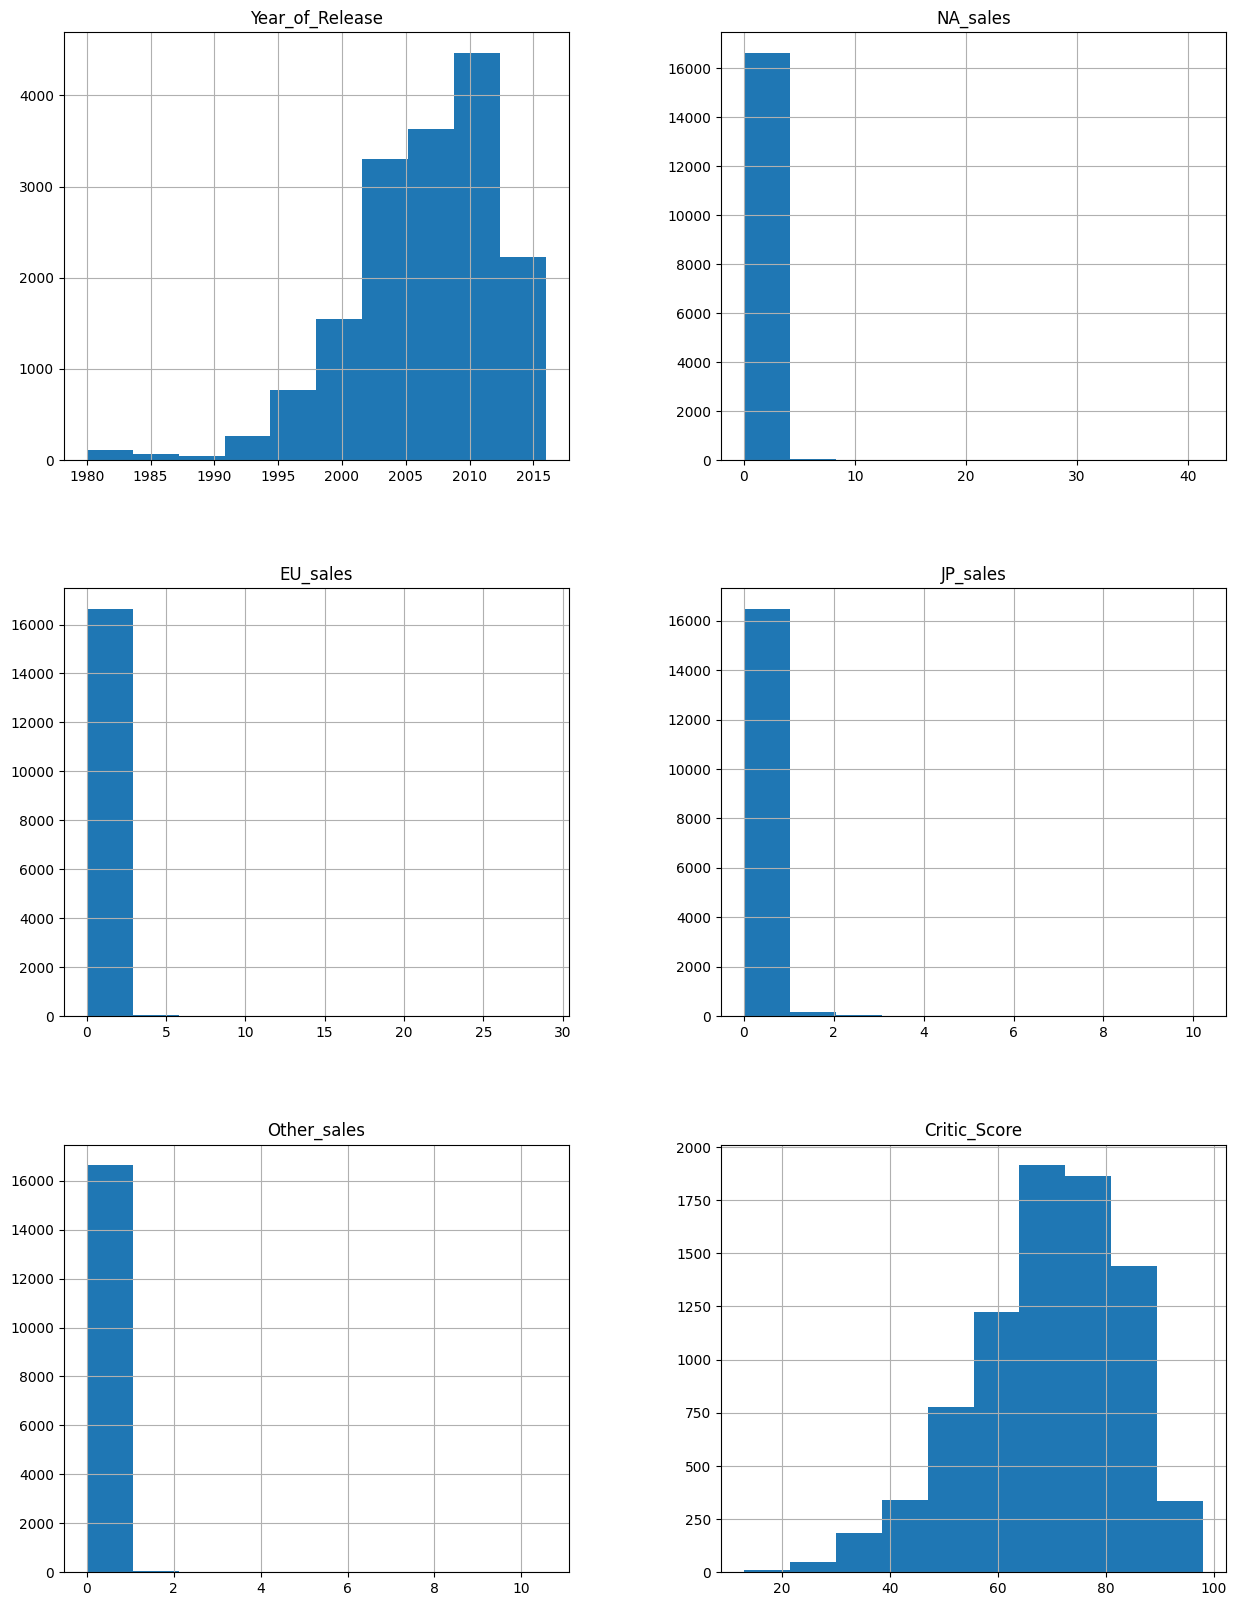

In [5]:
data.hist(figsize=(15, 20));

<div class="alert alert-info">
Во фрейме около 17 тысяч строк. Присутствуют названия игр и жанры, даты выпуска, продажи в трех регионах, оценки критиков и пользователей, а так же рейтинг.
  
По предварительному анализу видно, что основная доля игр с 2003 по 2012 годы. Оценки проектов критиками от 70 до 90 в большинстве. Продажи рассматриваются как минимум в трех регионах Северной Америке, Европе и Японии.

## Предобработка данных

### Корректировка имен столбцов

In [6]:
column_names = {name: name.lower() for name in data.columns}
data = data.rename(columns=column_names)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />можно

    games.columns = games.columns.str.lower()

<div class="alert alert-info">
Спасибо, принято к сведению!

### <font color='#22a9eb'> Пропущенные значения </font>

<div class="alert alert-info">
Определим количество пропущенных значений в датафрейме.

In [7]:
data.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

<div class="alert alert-info">
В датафрейме есть 8578 пропущенных значений в столбце оценок критиков, 6766 значений для рейтинга и примерно столько же для пользовательских оценок. Вычислим долю пропусков от всех значений.

In [8]:
pd.DataFrame(round(data.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
critic_score,51.300000
rating,40.500000
user_score,40.100000
year_of_release,1.600000
name,0.000000
genre,0.000000
platform,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


Доля пропущенных значений позволяет сделать следующие выводы и предположения:
- **genre** и **name** пропущено всего по 2 значения, может удалить эти пропуски;
- **year_of_release** для года релиза пропущено уже 269 значений, но доля пропусков составляет около 1.6%. Поскольку их количество незначительно, то так же удалим из дата фрейма - на общую выборку это значительно не повлияет;
- **critic_score**, **rating** и **user_score** содержат более 40% пропусков и удалить из фрейма такой объем данных невозможно. Эти записи в целом содержат оценки пользователей, критиков или общий рейтинг, а значит заполнение какими-либо данными невозможно. оставляем столбцы пустыми.

In [9]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

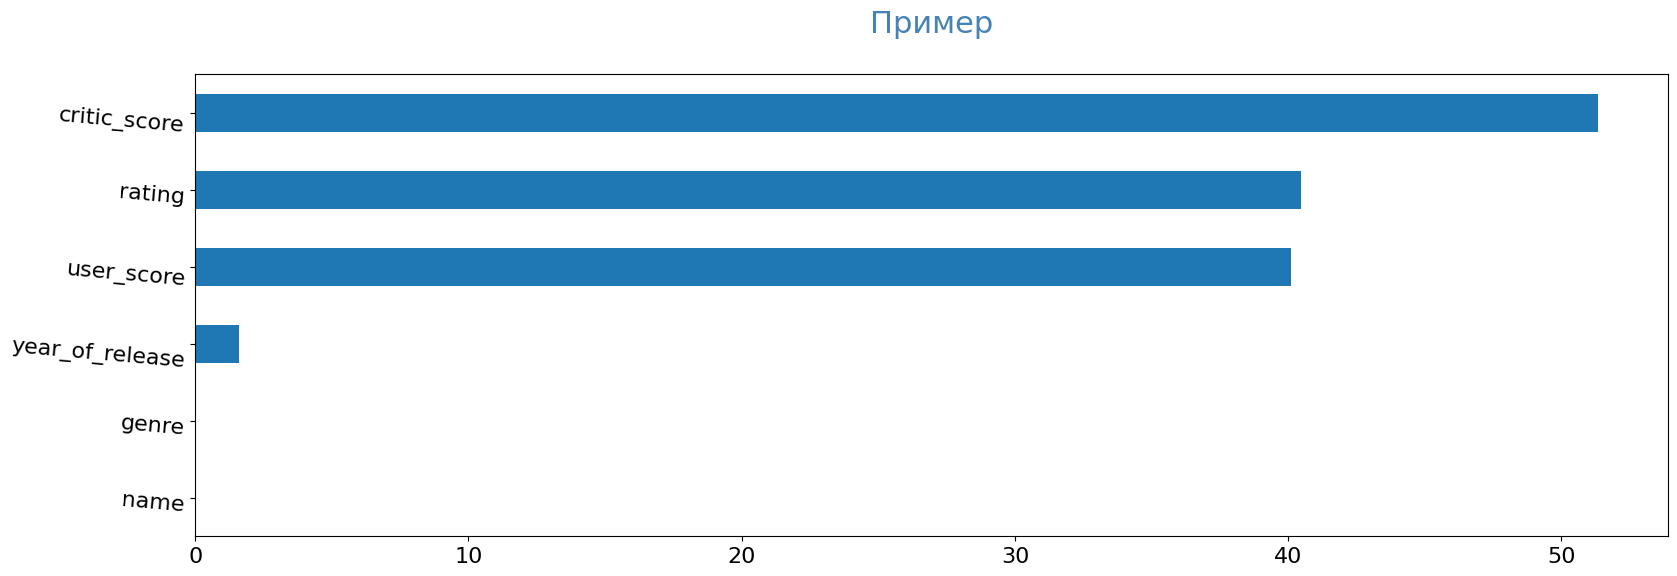

In [10]:
pass_value_barh(data)

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br /> Наглядность представления информации одна из важных составляющих работы дата-аналитика или дата-сайентиста
    
__мой график оформлен не совсем корректно, сможешь отметить, что стоило бы исправить в графике?__
  

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br />
Сделал без описания того, а что собственно делаю. В твоём графике так же не хватает описания полей(осей). Не понятно зачем этот график нужен и что иллюстрирует. 
  
Обратил внимание, что не пишу, что делаю в этом моменте. Чистый код, по сути, мол, думайте сами, что тут делаю. Плохая практика. Описание иногда лучше кода. Можно прочитать одно предложение и пропустить страницы с кодом.

<div class="alert alert-info">
<i>Помещаю это раньше удаления, хоть и стараюсь придерживаться правила "коммент ревьювера ниже коммент студента".</i>
  
Следует проверить, что эти данные содержат, и влияют ли на значения продаж.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Принимается 🤝
        
За поворот текста отвечает параметр rot, можно добавить обозначение оси х (процент записей с пропусками)
        
        df.isna().mean()*100 — для расчета процента пропусков в колонке
        
На графике мы оцениваем масштаб проблемы с пропусками и возможное совпадение % пропущенных значений в колонках
        
добавить подписи к осям мешает строка кода
        
        .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        
её можно заменить на        
        
        plt.title('Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
        plt.xlabel('Процент пропусков', fontsize=22)
        plt.ylabel('Столбцы с пропусками')

плюс можно установить шкалу от 0 до 100       
        
        plt.xlim(0, 100)        

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
        
        
            (df.isna().mean()*100) — расчет пропусков
            .to_frame() — превращение серии в датафрейм
            .rename(columns = {0:'space'}) — переименование полученного столбца, чтобы можно было обращаться по имени
            .query('space > 0') — фильтрация полученных строк, чтобы не выводить строки, где данные без пропусков
            .sort_values(by = 'space', ascending = True) — сортировка
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16) — отрисовка графика
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')  — установка названия

In [11]:
data_na = data.loc[(data['name'].isna()
                ) | (data['genre'].isna()
                ) | (data['year_of_release'].isna())]

Рассмотрим значения продаж для данных разных регионов с пропусками в сравнении со всеми данными для этих регионов.

In [12]:
display(data['na_sales'].describe())
data_na['na_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

count    271.000000
mean       0.224834
std        0.434025
min        0.000000
25%        0.010000
50%        0.090000
75%        0.245000
max        4.260000
Name: na_sales, dtype: float64

In [13]:
display(data['eu_sales'].describe())
data_na['eu_sales'].describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

count    271.000000
mean       0.092214
std        0.208947
min        0.000000
25%        0.000000
50%        0.020000
75%        0.100000
max        2.360000
Name: eu_sales, dtype: float64

In [14]:
display(data['jp_sales'].describe())
data_na['jp_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

count    271.000000
mean       0.024834
std        0.089839
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.770000
Name: jp_sales, dtype: float64

In [15]:
display(data['other_sales'].describe())
data_na['other_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

count    271.000000
mean       0.032066
std        0.075347
min        0.000000
25%        0.000000
50%        0.010000
75%        0.030000
max        0.710000
Name: other_sales, dtype: float64

Значения продаж для строк с отсутствующими данными не повлияют на общее сравнение продаж, поскольку не содержат данные выбивающиеся из датафрейма.

In [16]:
print('Доля продаж от пропусков na_sales:', round((data_na['na_sales'].sum()/data['na_sales'].sum())*100, 2), '%')
print('Доля продаж от пропусков eu_sales:', round((data_na['eu_sales'].sum()/data['eu_sales'].sum())*100, 2), '%')
print('Доля продаж от пропусков jp_sales:', round((data_na['jp_sales'].sum()/data['jp_sales'].sum())*100, 2), '%')
print('Доля продаж от пропусков other_sales:', round((data_na['other_sales'].sum()/data['other_sales'].sum())*100, 2), '%')

Доля продаж от пропусков na_sales: 1.38 %
Доля продаж от пропусков eu_sales: 1.03 %
Доля продаж от пропусков jp_sales: 0.52 %
Доля продаж от пропусков other_sales: 1.1 %


Так же общая доля значений продаж для строк с пропусками от общих продаж составялет незначительное количество, которое не исказит исходный датафрейм, если эти строки исключить.

In [17]:
data = data.loc[(data['name'].notna()
                ) & (data['genre'].notna()
                ) & (data['year_of_release'].notna())]
data.isna().sum().sort_values(ascending=False)

critic_score       8461
rating             6676
user_score         6605
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Решение верное, перед удалением стоит посмотреть на записи — может они по 100 млн. продаж принесли ...
        
На этом проекте мы работаем с продажами, поэтому включается другой фактор, кроме процента потерь ...        

<div class="alert alert-info">
Тооочно, спасибо большое! Важно не только, что это эти данные составляют менее 5%, но и что они из себя представляют. Понял-принял, опыт получен, навык анализа прокачен :) 

Проанализируем распределение рейтинга игр.

In [18]:
data['rating'].value_counts()

rating
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

По выборке явно прослеживаются 4 лидера. Для начала следует понять, что это вообще за рейтинг и как он присваивается:
- **«E» («Everyone»)** — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера;
- **«T» («Teen»)** — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики;
- **«M» («Mature»)** — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории;
- **Everyone 10+** - это рейтинг ESRB, который предполагает, что видеоигра подходит для детей в возрасте от 10 лет и старше. Видеоигра с рейтингом E10 + может содержать больше мультфильмов, фэнтези или умеренного насилия, мягкий язык и / или минимум наводящих на размышления тем;
- **«EC» («Early childhood»)** — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Игры, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры;
- Игры с таким рейтингом содержат контент, который, по мнению комиссии, подходит для широкой аудитории; в них может редко использоваться "мягкое" насилие или мультяшное / фэнтезийное насилие, а также мягкие выражения. До 1998 года, когда она была переименована в **"Everyone", этот рейтинг был известен как "От детей до взрослых" (K-A)** (потенциальная замена);
- **«RP» ( «Rating Pending»)** — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоение рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза;
- **"Только для взрослых" (AO)** для 26 выпущенных видеоигр. Рейтинг AO является наивысшим в системе ESRB и указывает, что контент игры подходит только для игроков в возрасте от 18 лет и старше.

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера </b></font>
    <br /> 
    <font size="3", color = "black">
<br />          
Рейтинг ESRB — категориальные данные, стоит внимательно взглянуть на содержимое и предложить чем заполнить пропуски, возможно это поможет найти необычные различия в поведении клиентов, допом можно подумать над сокращением количества категорий
        
Т.к. записи с пропусками не учитываются при группировке данных, мы не сможем выявить реальный портрет клиента

<div class="alert alert-info">
И еще раз огромное спасибо! Сложно сразу переключиться и влиться в анатилику. Иногда категории лучше не трогать, а иногда их лучше заменить на что-то общее, чтобы не потерять связь. Пропущенные значения заменим на "without_rating". Так мы сможем их в дальнейшем отличить.

In [19]:
data['rating'] = data['rating'].fillna('without_rating')
data['rating'].value_counts()

rating
without_rating    6676
E                 3921
T                 2905
M                 1536
E10+              1393
EC                   8
K-A                  3
AO                   1
RP                   1
Name: count, dtype: int64

<div class="alert alert-info">
Осталось незначительное количество прочих рейтингов. Объединим некоторые рейтинги между собой по смыслу.

In [20]:
data['rating'] = data['rating'].replace({'K-A': 'E', 'AO': 'M', 'RP': 'without_rating'})
data['rating'].value_counts()

rating
without_rating    6677
E                 3924
T                 2905
M                 1537
E10+              1393
EC                   8
Name: count, dtype: int64

<div class="alert alert-info">
Объединяем 'K-A' в 'E', поскольку первый является прародителем второго. Так же 'AO' объединяем в 'M' поскольку первый ожидает только 18+, при этом второй может уже содержать материалы подобного характера, хоть и рассчитан на 17+. Рейтинг ожидания 'RP' определим как без рейтинга. Оставшиеся 8 значений для 'EC' оставим как есть, поскольку по тематике он не подходит ни к одному из оставшихся.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Отличное решение для столбца, который содержит категориальные данные, поможет определить ключевое различие в потрете пользователя
        
         .fillna('without_rating')

        
По второй части совета        
        
        without_rating    6677
        E                 3924
        T                 2905
        M                 1537
        E10+              1393
        
        EC                   8


     
стоит ответить на вопрос — нужны ли нам малочисленные категории? Все ли с ними в порядке, если их так мало?        

### <font color='#22a9eb'> Поиск дубликатов </font>

In [21]:
data['name'].duplicated().sum()

5018

In [22]:
data['name'].value_counts().sort_values(ascending=False)

name
Need for Speed: Most Wanted                            12
Ratatouille                                             9
FIFA 14                                                 9
LEGO Marvel Super Heroes                                9
Monopoly                                                8
                                                       ..
The Kore Gang                                           1
Battle Spirits: Digital Starter                         1
Great Battle Full Blast                                 1
Tabi no Yubisashi Kaiwachou DS: DS Series 5 Deutsch     1
Haitaka no Psychedelica                                 1
Name: count, Length: 11426, dtype: int64

In [23]:
data[data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,without_rating
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,without_rating
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,without_rating
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [24]:
data[data['name'] == 'Ratatouille']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1598,Ratatouille,DS,2007.0,Action,0.49,0.62,0.0,0.14,NaN,NaN,without_rating
2442,Ratatouille,PS2,2007.0,Action,0.31,0.00,0.0,0.53,65.0,8,E
3069,Ratatouille,PSP,2007.0,Action,0.22,0.27,0.0,0.16,64.0,7.1,E
3902,Ratatouille,PS3,2007.0,Action,0.09,0.32,0.0,0.10,55.0,4.8,E
3948,Ratatouille,Wii,2007.0,Action,0.43,0.03,0.0,0.04,62.0,6.7,E
6398,Ratatouille,X360,2007.0,Action,0.23,0.02,0.0,0.02,56.0,tbd,E
7681,Ratatouille,GBA,2007.0,Action,0.14,0.05,0.0,0.00,65.0,tbd,E
9015,Ratatouille,GC,2007.0,Action,0.11,0.03,0.0,0.00,60.0,5.6,E
14514,Ratatouille,PC,2007.0,Action,0.01,0.01,0.0,0.00,NaN,7.9,E


По дубликатам названий игр всё понятно - разные платформы, переиздания в разные годы.

In [25]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [26]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [27]:
data['rating'].unique()

array(['E', 'without_rating', 'M', 'T', 'E10+', 'EC'], dtype=object)

<div class="alert alert-info">
<i>После объединения групп эта часть уже не актуальна, но в рамках повторного ревью оставлю её, чтобы ты видел, как ушел дубль.</i>
  
Как было замечено ранее 'K-A' это раннее название 'E'. Посмотрим какие игры остались с устаревшим жанром.

In [28]:
data[data['rating'] == 'K-A']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


<div class="alert alert-info">
<i>После объединения групп эта часть уже не актуальна, но в рамках повторного ревью оставлю её, чтобы ты видел, как ушел дубль.</i>
  
Есть так же еще одно предположение, если есть игры у которые есть рейтинг и у этой же игры нет рейтинга, то данные по рейтингу можно взять из имеющегося. Если игра была с рейтингом "E", то она не может вдруг стать с рейтингом "AO".

In [29]:
data[data['rating'].isna()]['name'].value_counts()

Series([], Name: count, dtype: int64)

In [30]:
display(data[data['name'] == 'FIFA 12'])
display(data[data['name'] == 'The Amazing Spider-Man 2 (2014)'])
display(data[data['name'] == 'Avatar: The Game'])
display(data[data['name'] == 'Daytona USA'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
122,FIFA 12,PS3,2011.0,Sports,0.84,4.30,0.11,1.39,NaN,NaN,without_rating
278,FIFA 12,X360,2011.0,Sports,0.84,2.78,0.02,0.53,NaN,NaN,without_rating
2677,FIFA 12,Wii,2011.0,Sports,0.15,0.50,0.00,0.11,NaN,NaN,without_rating
3843,FIFA 12,PSP,2011.0,Sports,0.12,0.25,0.02,0.13,NaN,NaN,without_rating
4191,FIFA 12,PC,2011.0,Sports,0.04,0.33,0.00,0.10,NaN,NaN,without_rating
4902,FIFA 12,3DS,2011.0,Sports,0.08,0.26,0.00,0.05,NaN,NaN,without_rating
11237,FIFA 12,PS2,2011.0,Sports,0.00,0.02,0.00,0.06,NaN,NaN,without_rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3650,The Amazing Spider-Man 2 (2014),PS4,2014.0,Action,0.20,0.25,0.02,0.09,NaN,NaN,without_rating
6496,The Amazing Spider-Man 2 (2014),PS3,2014.0,Action,0.06,0.14,0.02,0.04,NaN,NaN,without_rating
6992,The Amazing Spider-Man 2 (2014),X360,2014.0,Action,0.10,0.11,0.00,0.02,NaN,NaN,without_rating
7253,The Amazing Spider-Man 2 (2014),XOne,2014.0,Action,0.12,0.08,0.00,0.02,NaN,NaN,without_rating
12384,The Amazing Spider-Man 2 (2014),3DS,2014.0,Action,0.03,0.03,0.00,0.01,NaN,NaN,without_rating
12720,The Amazing Spider-Man 2 (2014),WiiU,2014.0,Action,0.03,0.02,0.00,0.00,NaN,NaN,without_rating
16631,The Amazing Spider-Man 2 (2014),PC,2014.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,without_rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2302,Avatar: The Game,PS3,2009.0,Action,0.32,0.42,0.0,0.16,NaN,NaN,without_rating
2653,Avatar: The Game,X360,2009.0,Action,0.34,0.35,0.0,0.08,NaN,NaN,without_rating
2857,Avatar: The Game,Wii,2009.0,Action,0.32,0.32,0.0,0.07,NaN,NaN,without_rating
3369,Avatar: The Game,PSP,2009.0,Action,0.22,0.24,0.0,0.14,NaN,NaN,without_rating
4834,Avatar: The Game,DS,2009.0,Action,0.18,0.18,0.0,0.04,NaN,NaN,without_rating
13593,Avatar: The Game,PC,2009.0,Action,0.00,0.04,0.0,0.01,NaN,NaN,without_rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3626,Daytona USA,SAT,1994.0,Racing,0.0,0.0,0.55,0.0,NaN,NaN,without_rating


Выше для игры "Need for Speed: Most Wanted" были замечены строки без рейтинга и была идея заполнить пустые строки с ним из заполненных, но для других игр это не оправдалось. Какую часть строк можно будет "спасти", но они существенной роли не сыграют.
  
По категориальным столбцам дубликатов не обнаружено. Рейтинги пока оставляем без изменений.

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />   
На рабочих проектах стоит искать дубликаты по ключевым столбцам, для примера по сумме параметров: 
   
    ['name', 'platform', 'year_of_release']
    
С обязательным приведением содержимого категориальных колонок к нижнему регистру
        
В сырой выборке имеется 2 строчки неполных дубликатов
        
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicat#pandas.DataFrame.duplicated
</div>  

<div class="alert alert-info">
Очередное спасибо. В целом по наводке в документации и поиске на просторах яндекса нашел два дубля. Однако, после запуска переопределения жанров остался один дубль.

In [31]:
data.applymap(
    lambda x: x.lower() if isinstance(x, str) else x
).duplicated(
    subset=['name', 'platform', 'year_of_release']
).sum()

/tmp/ipykernel_20190/831674268.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data.applymap(


1

<div class="alert alert-info">
Предполагаю, что если мы находми сумму неполных дубликатов, значит этот же метод позволит и выделить эти дубликаты.

In [32]:
data[data.applymap(
    lambda x: x.lower() if isinstance(x, str) else x
).duplicated(
    subset=['name', 'platform', 'year_of_release']
)]

/tmp/ipykernel_20190/2545093115.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[data.applymap(


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


<div class="alert alert-info">
Если я правильно понимаю, то для этой строки могут быть неявные дубликаты по сочетанию трех колонок. Попробуем вывести эти строки.

In [33]:
data[data.applymap(
    lambda x: x.lower() if isinstance(x, str) else x
).duplicated(
    subset=['name', 'platform', 'year_of_release'],
    keep=False
)]

/tmp/ipykernel_20190/1557212465.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[data.applymap(


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
        Достаточно параметра ⬆⬆⬆
        
         keep=False
        
у парвметра имеются другие значения, стоит изучить справку        
         

In [34]:
data[(data['name'].isna()) & (data['platform'] == 'GEN') & (data['year_of_release'] == 1993.0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [35]:
doubles = data[(
    data['name'] == 'Madden NFL 13'
    ) & (data['platform'] == 'PS3'
    ) & (data['year_of_release'] == 2012.0)
]
doubles

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Объединим эти две строки.

In [36]:
summ = data.loc[[doubles.index[0]], 'eu_sales'].values[0] + data.loc[[doubles.index[1]], 'eu_sales'].values[0]
data.loc[[doubles.index[0]], 'eu_sales'] = summ
data = data.drop(index=doubles.index[1]).reset_index()

In [37]:
doubles = data[(
    data['name'] == 'Madden NFL 13'
    ) & (data['platform'] == 'PS3'
    ) & (data['year_of_release'] == 2012.0)
]
doubles

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16443 non-null  int64  
 1   name             16443 non-null  object 
 2   platform         16443 non-null  object 
 3   year_of_release  16443 non-null  float64
 4   genre            16443 non-null  object 
 5   na_sales         16443 non-null  float64
 6   eu_sales         16443 non-null  float64
 7   jp_sales         16443 non-null  float64
 8   other_sales      16443 non-null  float64
 9   critic_score     7982 non-null   float64
 10  user_score       9838 non-null   object 
 11  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


<div class="alert alert-info">
Действительно похоже на дубли. Затясалось немного продаж в евро регионе, при этом оценки критиков и пользователей, а так же рейтинг одинаковые, что явно говорит про дубль.

### Изменение типов данных

Выведем общие сведения о датафрейме и первые строки.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16443 non-null  int64  
 1   name             16443 non-null  object 
 2   platform         16443 non-null  object 
 3   year_of_release  16443 non-null  float64
 4   genre            16443 non-null  object 
 5   na_sales         16443 non-null  float64
 6   eu_sales         16443 non-null  float64
 7   jp_sales         16443 non-null  float64
 8   other_sales      16443 non-null  float64
 9   critic_score     7982 non-null   float64
 10  user_score       9838 non-null   object 
 11  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


In [40]:
data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,without_rating
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,without_rating


Некорретный тип у столбца **year_of_release**. Для целочисленных годов выпуска указан вещестеный тип.

In [41]:
data['year_of_release'] = data['year_of_release'].astype(int)
print('Минимальный год:', data['year_of_release'].min())
print('Максимальный год:', data['year_of_release'].max())
data['year_of_release'].unique()

Минимальный год: 1980
Максимальный год: 2016


array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16443 non-null  int64  
 1   name             16443 non-null  object 
 2   platform         16443 non-null  object 
 3   year_of_release  16443 non-null  int64  
 4   genre            16443 non-null  object 
 5   na_sales         16443 non-null  float64
 6   eu_sales         16443 non-null  float64
 7   jp_sales         16443 non-null  float64
 8   other_sales      16443 non-null  float64
 9   critic_score     7982 non-null   float64
 10  user_score       9838 non-null   object 
 11  rating           16443 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 1.5+ MB


Обработаем теперь столбец **user_score**, который относится в типу строки.

In [43]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [44]:
data['user_score'].value_counts().head(10)

user_score
tbd    2376
7.8     322
8       285
8.2     276
8.3     252
7.5     249
8.5     247
7.9     246
8.1     237
7.7     236
Name: count, dtype: int64

Обращаем внимание на абревитауру *tbd*. Возможно ранее это было рейтингом ожидания игры. После выхода проекта все оценки заменили на *tbd*, чтобы оно не искажало общую картину оценок. Заменим это значение на None.

In [45]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = None
data['user_score'].value_counts().head(10)

user_score
7.8    322
8      285
8.2    276
8.3    252
7.5    249
8.5    247
7.9    246
8.1    237
7.7    236
7.3    232
Name: count, dtype: int64

In [46]:
pd.DataFrame(round(data.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
user_score,54.600000
critic_score,51.500000
index,0.000000
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


Общая доля пропусков в столбце **user_score** увеличилась примерно на 3 %. Зато теперь у нас нет непонятных строковоых значений и можно изменить типа данных на корректный.

In [47]:
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16443 non-null  int64  
 1   name             16443 non-null  object 
 2   platform         16443 non-null  object 
 3   year_of_release  16443 non-null  int64  
 4   genre            16443 non-null  object 
 5   na_sales         16443 non-null  float64
 6   eu_sales         16443 non-null  float64
 7   jp_sales         16443 non-null  float64
 8   other_sales      16443 non-null  float64
 9   critic_score     7982 non-null   float64
 10  user_score       7462 non-null   float64
 11  rating           16443 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


### <font color='#22a9eb'> Суммарные продажи

In [48]:
# Расчитываем сумму
cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data['sum_sales'] = data[cols].sum(axis=1)

# Передвигаем сумму продаж ближе к продажам для соблюдения логики распределения данных в датафрейме
column_to_move = data.pop('sum_sales')
data.insert(8, 'sum_sales', column_to_move)
data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,sum_sales,other_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,82.54,8.45,76.0,8.0,E
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,40.24,0.77,NaN,NaN,without_rating
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,35.52,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,32.77,2.95,80.0,8.0,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,31.38,1.00,NaN,NaN,without_rating


Так же выведем общую информацию о датафрейме.

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16443 non-null  int64  
 1   name             16443 non-null  object 
 2   platform         16443 non-null  object 
 3   year_of_release  16443 non-null  int64  
 4   genre            16443 non-null  object 
 5   na_sales         16443 non-null  float64
 6   eu_sales         16443 non-null  float64
 7   jp_sales         16443 non-null  float64
 8   sum_sales        16443 non-null  float64
 9   other_sales      16443 non-null  float64
 10  critic_score     7982 non-null   float64
 11  user_score       7462 non-null   float64
 12  rating           16443 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 1.6+ MB


Типы данных в столбцах датафрейма приведены в своотвествии с теми данными, которые в них располагаются. Бывший "рейтинг ожидания" в столбце **user_score** в виде абревиатуры *tbd* заменили на None.
  
Суммарные продажи вычислены. Данные подготовлены для дальнейшего анализа.

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />   
Как думаешь, почему могли возникнуть все эти пропуски?
        
         9   critic_score     7983 non-null   float64
         10  user_score       7463 non-null   float64
         11  rating           9768 non-null   object 
    

<div class="alert alert-info">
Чтобы ответить на этот вопрос, рассмотрим три столбца отдельно.
  
<b>Критики</b> оставляют отзывы не на все игры. Переиздания, платформы, но для одной и той же игры остаются без отзывов. Предполагаю, что в БД рейтинг появился позже и часть данных была без рейтинга вовсе.
    
<b>Пользователи</b> так же как и критики не всегда оставляют оценки на разные платформы или игры. Поскольку пропусков хватает как для оценок критиков, так и пользователей, то предположение об отсутствии этих болей в БД на ранней стадии не существовал.
    
<b>Рейтинг</b> могли пока не присвоить, могли не присваивать в принципе, ведь это зависит от страны и отсутствия жестких требований по рейтингу. В плане присвоения. Если игра полна жестокости и продается без рейтинга, то разработчика могут оштрафовать за это и запретить продажи в регионе, если будут жалобы или так решат цензоры. Так же могли быть проблемы с присвоением рейтинга в разных странах, в одной игра очень жестока и только 18+, а в другой можно для тинейджеров. При таком сочетании сложно четко определить рейтинг игры, если разработчики заранее сами его не определили.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />плюс  отсутствие ресурсов на сбор информации (время, деньги)

## Исследовательский анализ данных

### <font color='#22a9eb'> Выпуск игр по годам

<div class="alert alert-info">
Построим столбчатую диаграмму выпуска игр по годам.

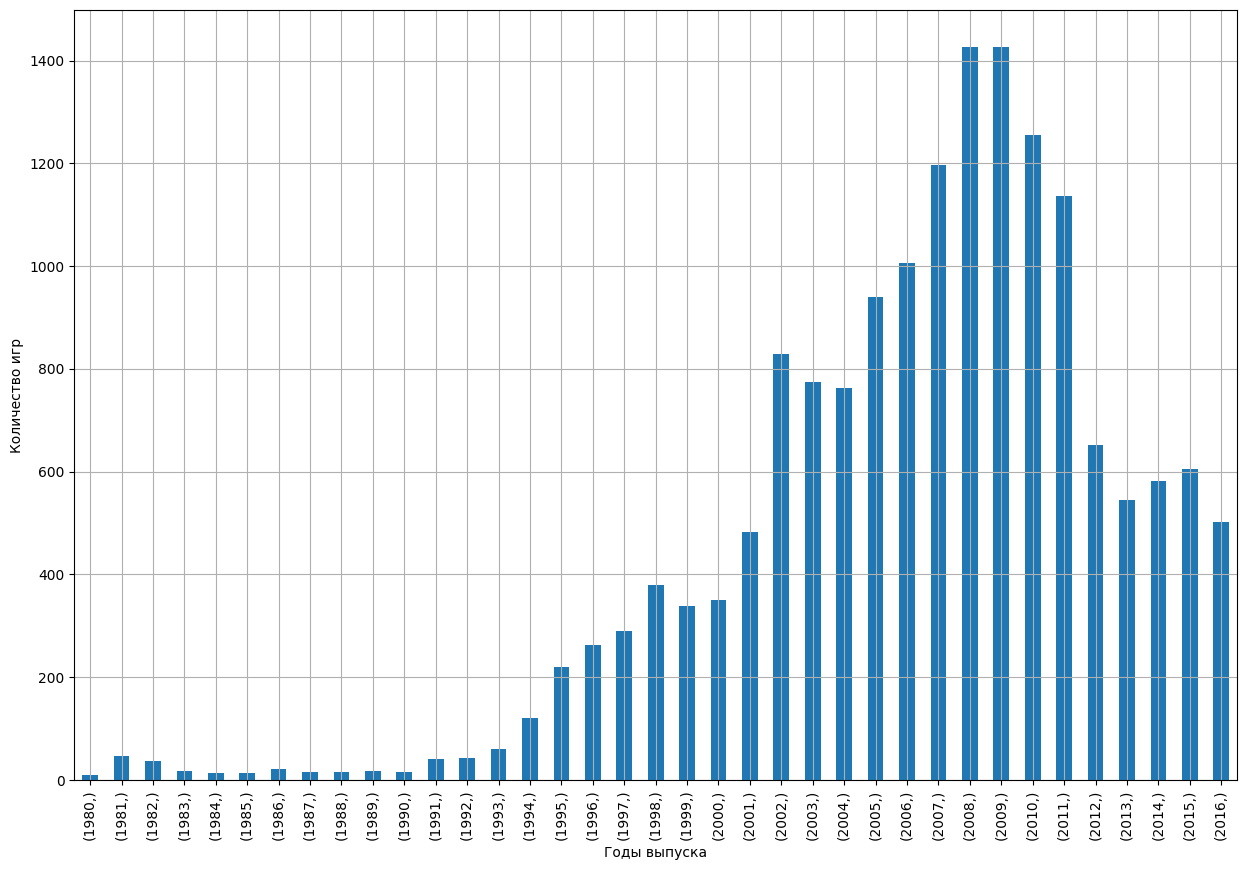

In [50]:
ax_data = data[
        ['year_of_release']
    ].value_counts(sort=False
    ).plot(
        kind="bar",
        figsize=(15,10),
        grid=True
)
ax_data.set_xlabel('Годы выпуска')
ax_data.set_ylabel('Количество игр')
plt.show()

In [51]:
data['year_of_release'].value_counts()

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64

Доля игр по годам в общем датафрейме.

In [52]:
round((data['year_of_release'].value_counts() / data['year_of_release'].count()
      ).sort_values(ascending=False) * 100, 2)

year_of_release
2008    8.68
2009    8.67
2010    7.63
2007    7.28
2011    6.91
2006    6.12
2005    5.71
2002    5.04
2003    4.71
2004    4.63
2012    3.97
2015    3.69
2014    3.53
2013    3.31
2016    3.05
2001    2.93
1998    2.30
2000    2.13
1999    2.06
1997    1.76
1996    1.60
1995    1.33
1994    0.74
1993    0.36
1981    0.28
1992    0.26
1991    0.25
1982    0.22
1986    0.13
1989    0.10
1983    0.10
1990    0.10
1987    0.10
1988    0.09
1985    0.09
1984    0.09
1980    0.05
Name: count, dtype: float64

Пик производства игр пришелся на 2008 год, небольшой спад в 2009 году и далее количество игр пошло на спад. Если увлекаться играми и углубляться в процессы, то это экономический кризис 2008 года. Компании, которые вкладывали в игры большие деньги - потеряли их. Перестройка подхода к разработке игр от "мы веселая команда" к "менеджеры определяют траекторию развития, программисты не учат менеджеров, а тыкают по клавишам". Крупные компании покупают маленькие студии и проекты выпускаются более качественные, но в меньших количествах.
  
По части периодов для общего анализа исключительно в рамках данной задачи берем ~~пятилетку~~ три года. В геймдеве больше брать смысле нет, в идеале пройтись бы по перспективным технологиям, проанализировать даты выхода ближайщих новинок и оценить рейтинги ожиданий.

###  <font color='#22a9eb'> Продажи по платформам

Определим 11-ть самых прибыльных платформ.

In [53]:
perspective_platform = data.pivot_table(
    index='platform',
    values='sum_sales',
    aggfunc='sum'
).sort_values(
    by='sum_sales',
    ascending=False
).head(11)
perspective_platform

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Построим графики распределения продаж игр на разных платформах по годам.

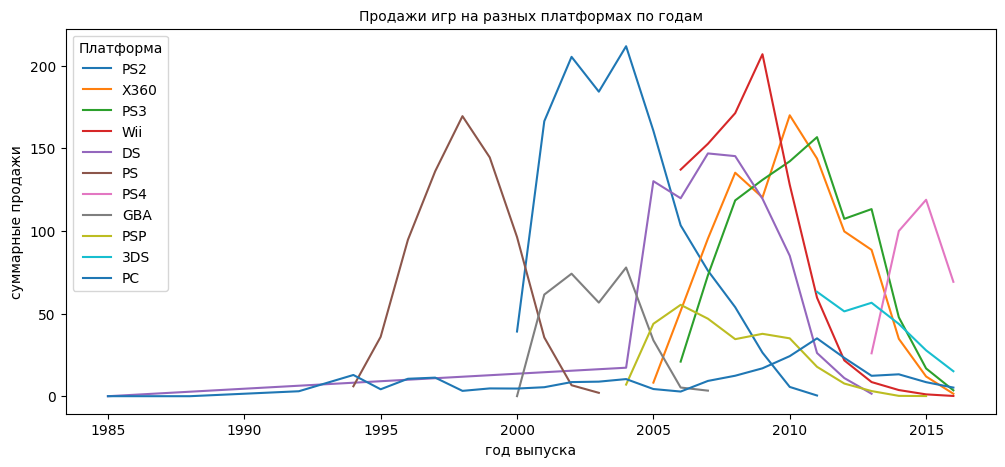

In [54]:
for platf in perspective_platform.index:
    subset = data[data['platform'] == platf]
    
    subset.groupby('year_of_release')['sum_sales'].sum().plot(figsize=(12,5))

plt.legend(perspective_platform.index, title='Платформа')
plt.title("Продажи игр на разных платформах по годам", fontsize=10)
plt.xlabel('год выпуска', fontsize=10)
plt.ylabel('суммарные продажи', fontsize=10)
plt.show()

<div class="alert alert-info">
Размер графика увеличен. Точно, в очередной раз спасибо. Мне показалось странным, что есть такая длинная линия для "DS", но как-то не стал это анализировать, а надо было бы. Для этого мы и строим графики.
  
Нинтендо DS появилось в 2004 году, а значит в 1985 году ничего такого быть не могло. Проверим этот выброс.

In [55]:
data[data['platform'] == 'DS'].sort_values(by='year_of_release').head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,sum_sales,other_sales,critic_score,user_score,rating
15704,15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.02,0.0,NaN,NaN,without_rating
13253,13463,Cocoto Kart Racer,DS,2004,Racing,0.04,0.00,0.00,0.04,0.0,NaN,NaN,E
11339,11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.08,0.0,NaN,NaN,without_rating
4360,4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.43,0.0,NaN,NaN,without_rating
7778,7902,Daigasso! Band Brothers,DS,2004,Misc,0.00,0.00,0.19,0.19,0.0,NaN,NaN,without_rating


<div class="alert alert-info">
Игра "Strongest Tokyo University Shogi DS" вышла в 2010 году, а не 1985. Удалим аномалию.

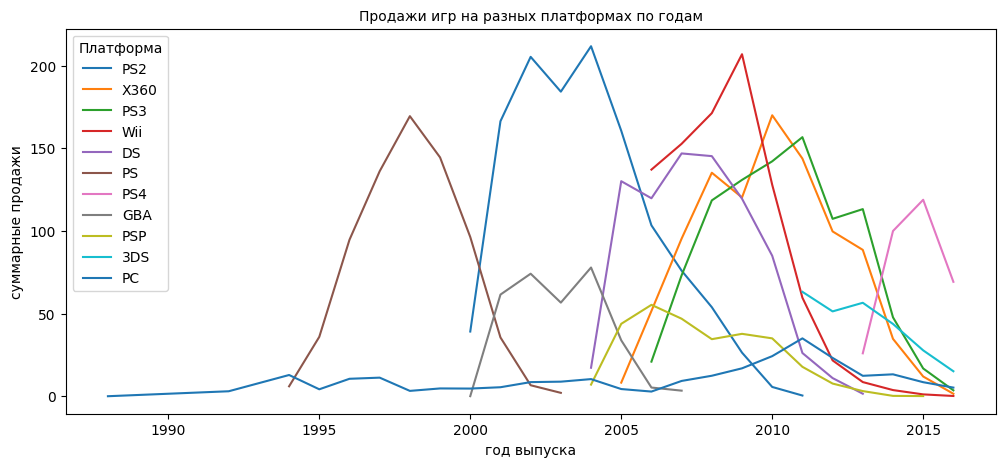

In [56]:
data = data.loc[(data['name'] != 'Strongest Tokyo University Shogi DS') & (data['year_of_release'] != 1985)]
for platf in perspective_platform.index:
    subset = data[data['platform'] == platf]
    
    subset.groupby('year_of_release')['sum_sales'].sum().plot(figsize=(12,5))

plt.legend(perspective_platform.index, title='Платформа')
plt.title("Продажи игр на разных платформах по годам", fontsize=10)
plt.xlabel('год выпуска', fontsize=10)
plt.ylabel('суммарные продажи', fontsize=10)
plt.show()

Логически можно задать вопрос: существует ли какой-то характерный срок существования разных платформ?
  
Если рассматривать плойки, то наблюдается тенденция десятилетки - раз в 10 лет выпускать новую консоль.
- "PS" прожила с 1994 по 2003 примерно;
- "PS2" была в некотором смысле прорывом с своём роде и показала одни из лучших продаж за всё время, прожила с 2000 по 2010 год;
- "PS3" актуальна примерно с 2005 по 2015 год;
- "PS4" выпустили с 2013 и далее нам уже не хватает данных во фрейме. Потом еще будет "PS4 Pro" - неудачный маркетиговый ход;
  
Количество игр для пк-бояр увеличивается размеренно. Конечно, есть эксклюзивы на определенных платформах, но рано или поздно, появляются на ПК.
  
Можно так же выделить "Wii". Интересный и резкий старт в 2005 году, а потом такой же резкий уход в закат в 2012. Небольшое количество эксклюзивов, не совсем удачные игры и платформа становится актуальной в рамках небольшого сообщества.

Некоторые менее известные платформы живут и того меньше - около 5 лет, типа геймбой, некоторые модели нинтендо.
  
Можно так же отдельно рассмотреть и остальные платформы, но они не сообо актуальны для нашего сообщества.Единственное, что еще можно отметить, серия "XBOX" выбрала тактику "PS", поэтому новая консоль выходит примерно раз в 10 лет.
  
Ну и конечно же консоли умрут, а ПК будет жизнь вечно!

### <font color='#22a9eb'> Платформы за актуальный период

В целом, к актуальному периоду можно отности порядка 10 лет, но в современных реалиях это достаточно большой срок, потому что технологии активно развиваются, платформы сменяют себя в зависимости от актуальности и интереса проектов. Если мы хотим услышать о жизни человека, то не начинаем рассказ с пеленок, а как правило ожидаем услышать наиболее важные события. ~Для платформы это 5 лет время когда мы застали либо рост, либо подъем, либо период как подъема, так и начинающегося спада.~

In [57]:
#current_year = data['year_of_release'].max() - 5
#current_data = data.query("year_of_release >= @current_year")

#current_data['year_of_release'].value_counts()

<div class="alert alert-da ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит
        
        current_year = data['year_of_release'].max() - 5

<div class="alert alert-info">
Для платформы это 3 года время когда мы застали либо рост, либо подъем, либо период как подъема, так и начинающегося спада.

In [58]:
current_year = data['year_of_release'].max() - 3
current_data = data.query("year_of_release > @current_year")

current_data['year_of_release'].value_counts()

year_of_release
2015    606
2014    581
2016    502
Name: count, dtype: int64

Определим лидеров последних лет.

In [59]:
perspective_platform_new = current_data.pivot_table(
    index='platform',
    values='sum_sales',
    aggfunc='sum'
).sort_values(
    by='sum_sales',
    ascending=False
).head(11)
display(perspective_platform)
perspective_platform_new

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


При сравнении двух срезов данных мы видим, что лидеры остались примерно те же, сменилось только поколение консолей. При этом ПК уже не внизу списка, а в середине топа. Однако в целом суммарные продажи уменьшились. Обусловлено это меньшим количеством релизов, да и не такой большой покупательной способностью. Кроме того и торренты тоже хороши...

Посчитаем общую долю продаж разных платформ и сравним с текущими реалиями.

In [60]:
fraction_platform = perspective_platform/perspective_platform.sum() * 100
fraction_platform_new = perspective_platform_new/perspective_platform_new.sum() * 100
fraction_platform_new - (fraction_platform - fraction_platform_new)

,sum_sales
platform,
3DS,20.071133
DS,NaN
GBA,NaN
PC,3.751208
PS,NaN
PS2,NaN
PS3,5.346349
PS4,74.502738
PSP,-4.050598


На текущий момент есть смысл выбрать такие платформы как "PS4", "XOne"(сравнительно новая и делаем ставку на неё, чем на 360), "3DS", "PC", ~так же еще сохраняется положительная динами у "PS3".~

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
"PS3" уже исполнилось 11 лет и она с малой вероятностью станет перспективной в 2017 году

<div class="alert alert-info">
Да, от "PS3" отказываемся, так как игры для неё будут просто пылиться.

### <font color='#22a9eb'> Ящик с усами по глобальным продажам

Для начала создадим таблицу на основе исходной, но по нужным данным:

In [61]:
new_data = current_data.pivot_table(index=['platform', 'name'], values='sum_sales', aggfunc='sum').reset_index()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   platform   1689 non-null   object 
 1   name       1689 non-null   object 
 2   sum_sales  1689 non-null   float64
dtypes: float64(1), object(2)
memory usage: 39.7+ KB


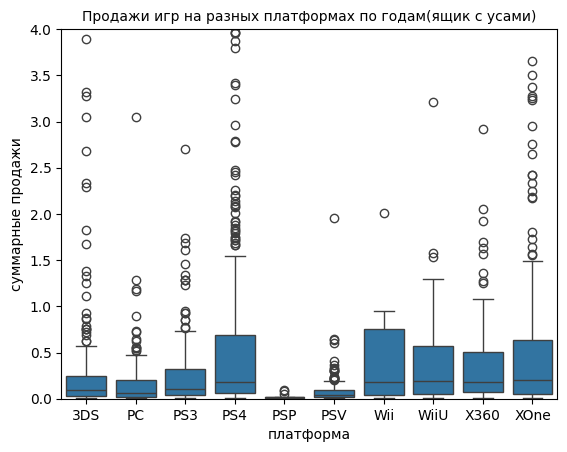

In [62]:
sns.boxplot(x='platform', y='sum_sales', data=new_data)
sns.set(rc={'figure.figsize':(12,10)})

plt.ylim(0, 4)
plt.title("Продажи игр на разных платформах по годам(ящик с усами)", fontsize=10)
plt.xlabel('платформа', fontsize=10)
plt.ylabel('суммарные продажи', fontsize=10)
plt.show()

Красивые графики получены. осталось описать результат. Для всех платформ встречается множество выбросов. Наименьшее количество выбросов на "PS2", "PSP". Это же подтверждает ранние предположения по выбору платформы. Построим так же график без выбросов.

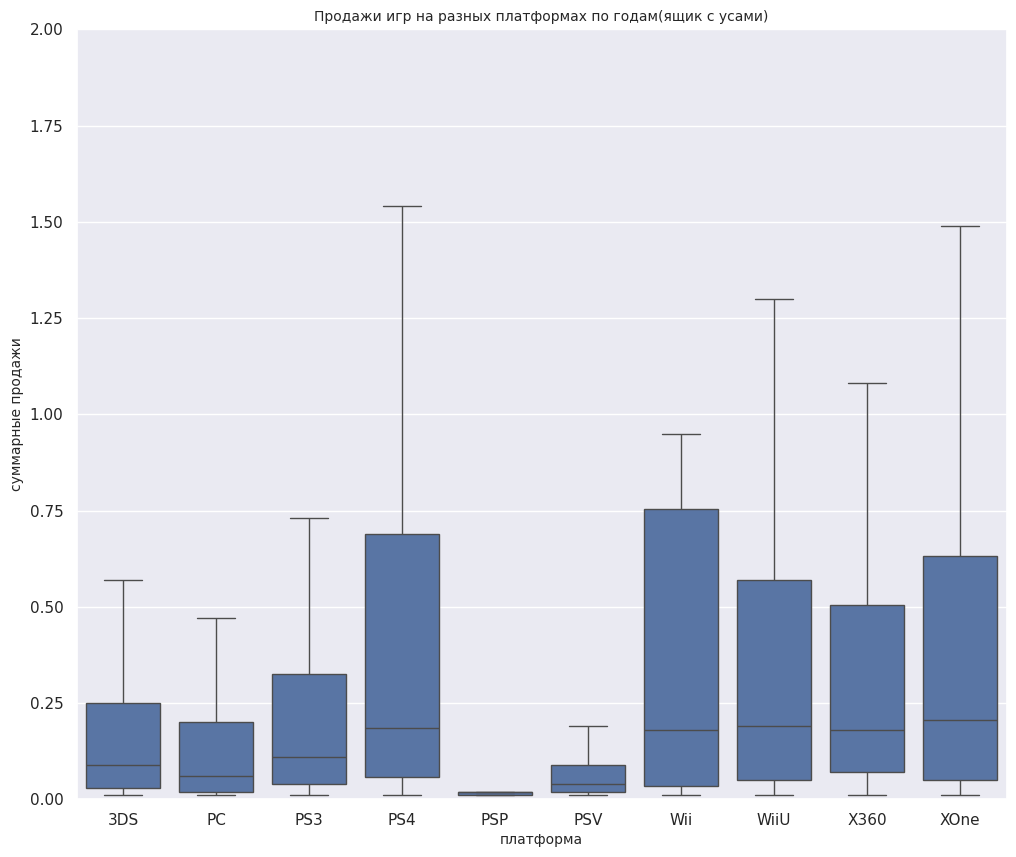

In [63]:
sns.boxplot(x='platform', y='sum_sales', data=new_data, showfliers=False)
sns.set(rc={'figure.figsize':(12,10)})

plt.ylim(0, 2)
plt.title("Продажи игр на разных платформах по годам(ящик с усами)", fontsize=10)
plt.xlabel('платформа', fontsize=10)
plt.ylabel('суммарные продажи', fontsize=10)
plt.show()

Если сравнить медианные значения с ранее проведенным анализом, то относительно плоек и иксов результат подтверждается. Но видим так же медианное значение для платформы семейства "Wii", которое так же неплохо себя показывает по суммарным продажам. Стоит проверить отдельно, не было ли ошибочным предыдущее предположение.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Что показывают нам две диаграммы размаха — кол-во выбросов, это игры, которые принесли максимум выручки. Т.е. можно платформы/жанры сравнить по кол-ву игр-рекордсменов, а значит определить, какая из них способна выпустить наиболее привлекательные для игроманов игры. Это про выбросы
        
Второй вид мы используем для того, чтобы сравнить медианные продажи по платформе/жанру, чтобы уточнить в каком кол-ве продаются игры на платформе/жанре, какая из них более стабильна в продажах...
        
        
Две хорошие статьи про диаграмму размаха
        
[Ящики, усы и скрипки](https://habr.com/ru/articles/533726/) 
        
[Исследуем отношение между переменными](https://dfedorov.spb.ru/pandas/downey/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D0%B5%D0%BC%20%D0%BE%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.html?)
       

<div class="alert alert-info">
Спасибо за ресурсы, они отлично иллюстрируют всё и объясняют.
  
Красивые графики получены. осталось описать результат. Для всех платформ встречается множество выбросов. Наименьшее количество выбросов на "PSP", "Wii", "WiiU". Это же подтверждает ранние предположения по выбору платформы. Больше всего выбросов у "PS4", "3DS" и "XOne", что говорит об этих платформах как более прибыльных, то есть тех, кто может дать высокую прибыль.

In [64]:
current_data.pivot_table(index='platform', columns='year_of_release', values='sum_sales', aggfunc='sum')

year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


<div class="alert alert-info">
Нет, выбранный ранее метод подтвердился - платформа "Wii" с <s>2011</s> 2014 года убывает относительно продаж игр, а платформа "WiiU" в 2014 показывала рост, но затем так же пошла на убыль.

### <font color='#22a9eb'> Анализ популярной платформы

Для анализа возьмём платформу "PS4".

In [65]:
data_ps4 = current_data[current_data['platform'] == 'PS4']
data_ps4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376 entries, 31 to 16313
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            376 non-null    int64  
 1   name             376 non-null    object 
 2   platform         376 non-null    object 
 3   year_of_release  376 non-null    int64  
 4   genre            376 non-null    object 
 5   na_sales         376 non-null    float64
 6   eu_sales         376 non-null    float64
 7   jp_sales         376 non-null    float64
 8   sum_sales        376 non-null    float64
 9   other_sales      376 non-null    float64
 10  critic_score     237 non-null    float64
 11  user_score       242 non-null    float64
 12  rating           376 non-null    object 
dtypes: float64(7), int64(2), object(4)
memory usage: 41.1+ KB


Выведем топ 10 игр по продажам.

In [66]:
data_ps4.pivot_table(
    index=['name', 'critic_score', 'user_score'],
    values='sum_sales',
    aggfunc='sum'
).reset_index(
).sort_values(
    by='sum_sales',
    ascending=False
).head(10)

,name,critic_score,user_score,sum_sales
78,Grand Theft Auto V,97.0,8.3,12.62
66,FIFA 16,82.0,4.3,8.58
28,Call of Duty: Advanced Warfare,83.0,5.7,7.66
67,FIFA 17,85.0,5.0,7.60
69,Fallout 4,87.0,6.5,7.17
65,FIFA 15,82.0,5.7,6.08
39,Destiny,76.0,6.1,5.64
217,Uncharted 4: A Thief's End,93.0,7.9,5.39
218,Uncharted: The Nathan Drake Collection,86.0,8.1,4.62
29,Call of Duty: Infinite Warfare,77.0,3.4,4.47


Топ 10 игр по оценкам критиков.

In [67]:
data_ps4.pivot_table(
    index=['name', 'critic_score', 'user_score'],
    values='sum_sales',
    aggfunc='sum'
).reset_index(
).sort_values(
    by='critic_score',
    ascending=False
).head(10)

,name,critic_score,user_score,sum_sales
78,Grand Theft Auto V,97.0,8.3,12.62
217,Uncharted 4: A Thief's End,93.0,7.9,5.39
112,Metal Gear Solid V: The Phantom Pain,93.0,8.2,3.42
23,Bloodborne,92.0,8.6,2.48
201,The Witcher 3: Wild Hunt,92.0,9.2,3.97
151,Rayman Legends,90.0,8.5,1.02
139,Overwatch,90.0,6.1,2.14
172,Shovel Knight,90.0,7.6,0.07
48,Dragon Age: Inquisition,89.0,7.4,2.01
203,Titanfall 2,89.0,8.4,0.76


Топ 10 игр по оценкам пользователей.

In [68]:
data_ps4.pivot_table(
    index=['name', 'critic_score', 'user_score'],
    values='sum_sales',
    aggfunc='sum'
).reset_index(
).sort_values(
    by='user_score',
    ascending=False
).head(10)

,name,critic_score,user_score,sum_sales
201,The Witcher 3: Wild Hunt,92.0,9.2,3.97
32,Dark Souls III,89.0,8.8,1.66
195,The King of Fighters XIV,79.0,8.7,0.15
72,Farming Simulator 17,69.0,8.7,0.42
159,Rocket League,85.0,8.7,0.36
23,Bloodborne,92.0,8.6,2.48
27,Brothers: A Tale of Two Sons,81.0,8.6,0.13
190,The Book of Unwritten Tales 2,63.0,8.6,0.07
99,Life is Strange,85.0,8.6,0.39
43,Digimon Story: Cyber Sleuth,75.0,8.5,0.12


Несмотря на высокие оценки пользователей, суммы продаж не самые высокие. Это же наблюдается и при высоких оценках критиков. Вы можете обожествлять игру, но продаваться она будет не так хорошо, и в то же время ну такая себе игра может продаваться гораздо лучше. Не забываем так же про фансервис и популярность самого стиля игры. Понятное дело, что шахматы будут не так популярны как гонки ввиду того, что гонками интересуются не только шахматисты.
  
Далее построим диаграму рассеяния и посчитаем корреляцию между отзывами и продажами. Для удоства и наглядности построим отдельно для юзверей и критиков.

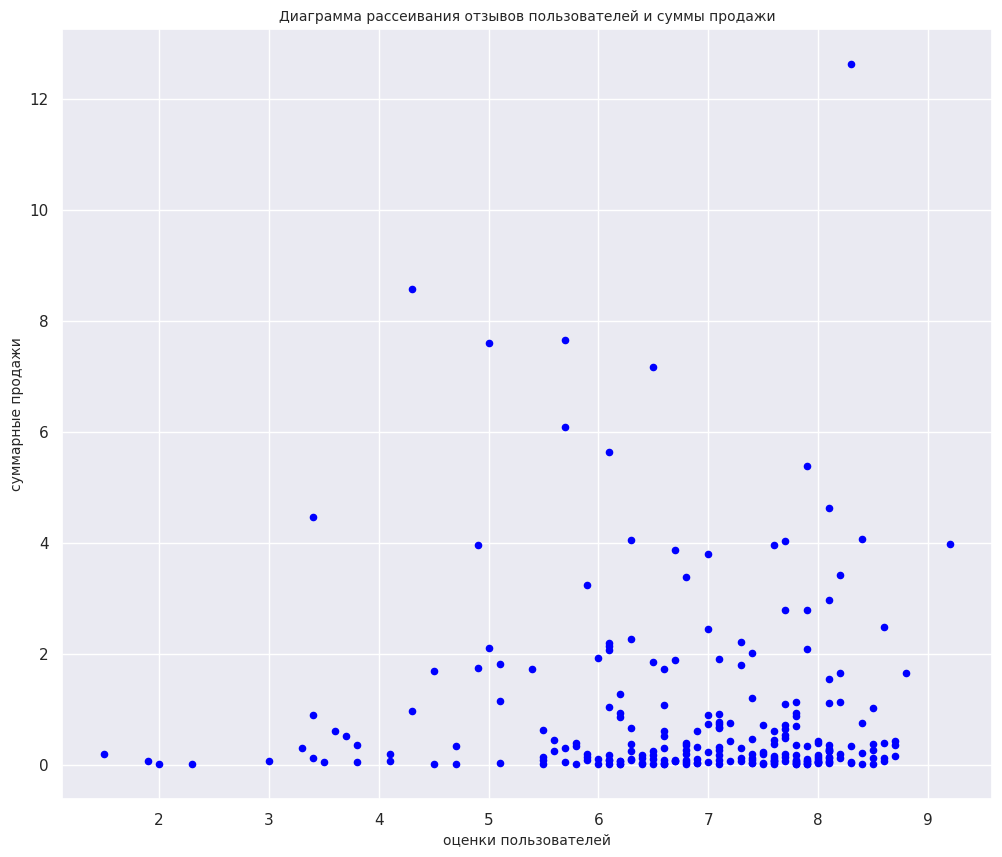

In [69]:
data_ps4.plot(x='user_score', y='sum_sales', kind='scatter', color="blue")
plt.title("Диаграмма рассеивания отзывов пользователей и суммы продажи", fontsize=10)
plt.xlabel('оценки пользователей', fontsize=10)
plt.ylabel('суммарные продажи', fontsize=10)
plt.show()

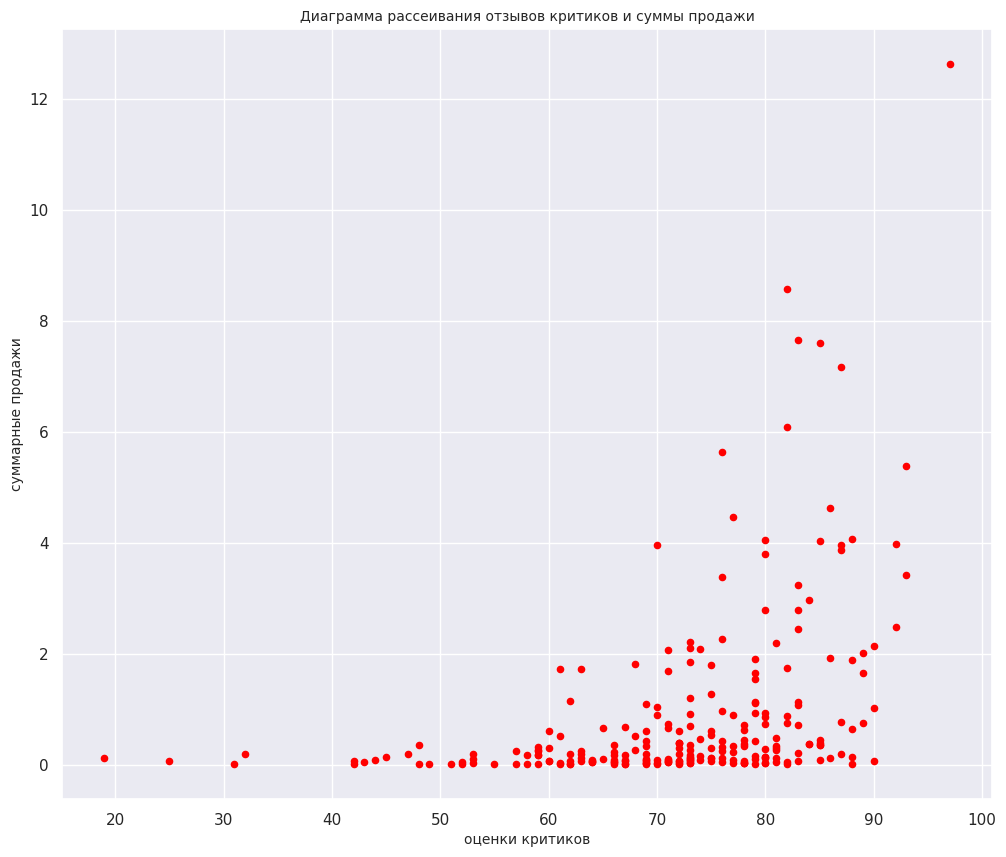

In [70]:
data_ps4.plot(x='critic_score', y='sum_sales', kind='scatter', color="red")
plt.title("Диаграмма рассеивания отзывов критиков и суммы продажи", fontsize=10)
plt.xlabel('оценки критиков', fontsize=10)
plt.ylabel('суммарные продажи', fontsize=10)
plt.show()

Диаграммы рассеивания подтвердили вывод по топ 10.
  
Посчитаем коэффициенты корреляции.

In [71]:
print('Коэффициент корреляции для критиков:', data_ps4['critic_score'].corr(data_ps4['sum_sales']))
print('Коэффициент корреляции для пользователей:', data_ps4['user_score'].corr(data_ps4['sum_sales'])) 

Коэффициент корреляции для критиков: 0.40266141068104083
Коэффициент корреляции для пользователей: -0.040131589472697356


Коэффициент корреляции для критиков в 0.41 говорит о не слишком сильной связи. Она есть, но не всегда, то есть высокие оценки критиков не приводят к значительному увеличению продаж.
  
Коэффициент корреляции для пользователей в 0.03 говорит об отсутсвии какой-либо связи между продажами и оценками пользователей. Высокие оценки не гарантируют высокие продажи.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />Возможно пользователи более критичны к играм, чем критики, но мы не сможем оценить какие действия повлияли на рост продаж в рамках нашего проекта (ограниченность имеющихся данных)
        
     
        
__Достаточно много игр с высокой оценкой критиков и слабой выручкой__
        
Приведу пример ложной корреляции, весьма известный в статистической литературе. Была исследована корреляционная связь между числом аистов, свивших гнезда в южных районах Швеции, и рождаемостью в эти же годы в Швеции. Расчёты, выполненные ради шутки, показали существенную положительную корреляцию между этими явлениями, хотя любому понятно, что это ложная корреляция.

Ещё пример ложной корреляции между приемом на работу новых менеджеров и созданием новых производственных мощностей. Возможно, именно менеджеры являются «причиной» капиталовложений в новые производственные мощности? Или же, наоборот, создание новых производственных мощностей послужило «причиной» приема на работу новых менеджеров?

Например, можно обнаружить сильную положительную связь (корреляцию) между разрушениями, вызванными пожаром, и числом пожарных, тушивших пожар. Следует ли заключить, что пожарные вызывают разрушения? Конечно, наиболее вероятное объяснение этой корреляции состоит в том, что размер пожара (внешняя переменная, которую забыли включить в исследование) оказывает влияние, как на масштаб разрушений, так и на числе привлеченных пожарных (т. е. чем больше пожар, тем большее количество пожарных вызывается на его тушение) .

"Соотнесите выводы с продажами игр на других платформах." - вот ту не понял, что от меня хотят. Мы выбрали одну платформу, но эти же выводы подойдут и для других платформ. Единственное, что может искажать данные это очень небольшое количество игр. Например если игр будет 3-5, то оценки могут в целом распределяться как очень близко друг к другу, так и максимально по-разному.

<div class="alert alert-dang er">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит выполнить исследование зависимости продаж от оценок пользователей и критиков по платформам конкурентам — рассмотреть в этом разделе отдельно две-три платформы
        
        ps3, xone 
       
Выводы, сделанные на основе расчетов по нескольким платформам выглядят "весомей" и убедительней

<div class="alert alert-info">
Принято, спасибо большое, логично!

Проведем так же анализ двух смежных популярных платформ "PS3" и "XOne".

In [72]:
data_ps3 = current_data[current_data['platform'] == 'PS3']
data_ps3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 180 to 16438
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            219 non-null    int64  
 1   name             219 non-null    object 
 2   platform         219 non-null    object 
 3   year_of_release  219 non-null    int64  
 4   genre            219 non-null    object 
 5   na_sales         219 non-null    float64
 6   eu_sales         219 non-null    float64
 7   jp_sales         219 non-null    float64
 8   sum_sales        219 non-null    float64
 9   other_sales      219 non-null    float64
 10  critic_score     36 non-null     float64
 11  user_score       98 non-null     float64
 12  rating           219 non-null    object 
dtypes: float64(7), int64(2), object(4)
memory usage: 24.0+ KB


<div class="alert alert-info">
Выведем топ 10 игр по продажам.

In [73]:
data_ps3.pivot_table(
    index=['name', 'critic_score', 'user_score'],
    values='sum_sales',
    aggfunc='sum'
).reset_index(
).sort_values(
    by='sum_sales',
    ascending=False
).head(10)

,name,critic_score,user_score,sum_sales
2,Assassin's Creed: Rogue,72.0,7.5,1.28
6,Dark Souls II,91.0,8.1,1.28
30,The LEGO Movie Videogame,80.0,6.8,0.93
28,South Park: The Stick of Truth,85.0,8.5,0.93
33,WWE 2K15,55.0,3.1,0.78
4,Borderlands: The Pre-Sequel,77.0,6.3,0.62
0,2014 FIFA World Cup Brazil,73.0,4.3,0.61
20,Metal Gear Solid V: Ground Zeroes,66.0,5.9,0.58
22,Naruto Shippuden: Ultimate Ninja Storm Revolution,73.0,7.5,0.44
18,MLB 14: The Show,81.0,6.8,0.43


<div class="alert alert-info">
Топ 10 игр по оценкам критиков.

In [74]:
data_ps3.pivot_table(
    index=['name', 'critic_score', 'user_score'],
    values='sum_sales',
    aggfunc='sum'
).reset_index(
).sort_values(
    by='critic_score',
    ascending=False
).head(10)

,name,critic_score,user_score,sum_sales
6,Dark Souls II,91.0,8.1,1.28
31,The Legend of Heroes: Trails of Cold Steel II,90.0,7.8,0.16
28,South Park: The Stick of Truth,85.0,8.5,0.93
25,Persona 4: Arena Ultimax,84.0,8.1,0.13
18,MLB 14: The Show,81.0,6.8,0.43
30,The LEGO Movie Videogame,80.0,6.8,0.93
16,Hatsune Miku: Project Diva F 2nd,78.0,8.6,0.25
4,Borderlands: The Pre-Sequel,77.0,6.3,0.62
3,Atelier Shallie: Alchemists of the Dusk Sea,76.0,7.7,0.18
15,GRID Autosport,75.0,6.8,0.18


<div class="alert alert-info">
Топ 10 игр по оценкам пользователей.

In [75]:
data_ps3.pivot_table(
    index=['name', 'critic_score', 'user_score'],
    values='sum_sales',
    aggfunc='sum'
).reset_index(
).sort_values(
    by='user_score',
    ascending=False
).head(10)

,name,critic_score,user_score,sum_sales
16,Hatsune Miku: Project Diva F 2nd,78.0,8.6,0.25
28,South Park: The Stick of Truth,85.0,8.5,0.93
7,Deception IV: Blood Ties,70.0,8.2,0.12
8,Dengeki Bunko Fighting Climax,66.0,8.2,0.15
6,Dark Souls II,91.0,8.1,1.28
25,Persona 4: Arena Ultimax,84.0,8.1,0.13
5,Castlevania: Lords of Shadow 2,63.0,7.8,0.20
31,The Legend of Heroes: Trails of Cold Steel II,90.0,7.8,0.16
1,Ar Nosurge: Ode to an Unborn Star,67.0,7.8,0.16
3,Atelier Shallie: Alchemists of the Dusk Sea,76.0,7.7,0.18


<div class="alert alert-info">
Далее построим диаграму рассеяния и посчитаем корреляцию между отзывами и продажами. Для удоства и наглядности построим отдельно для юзверей и критиков.

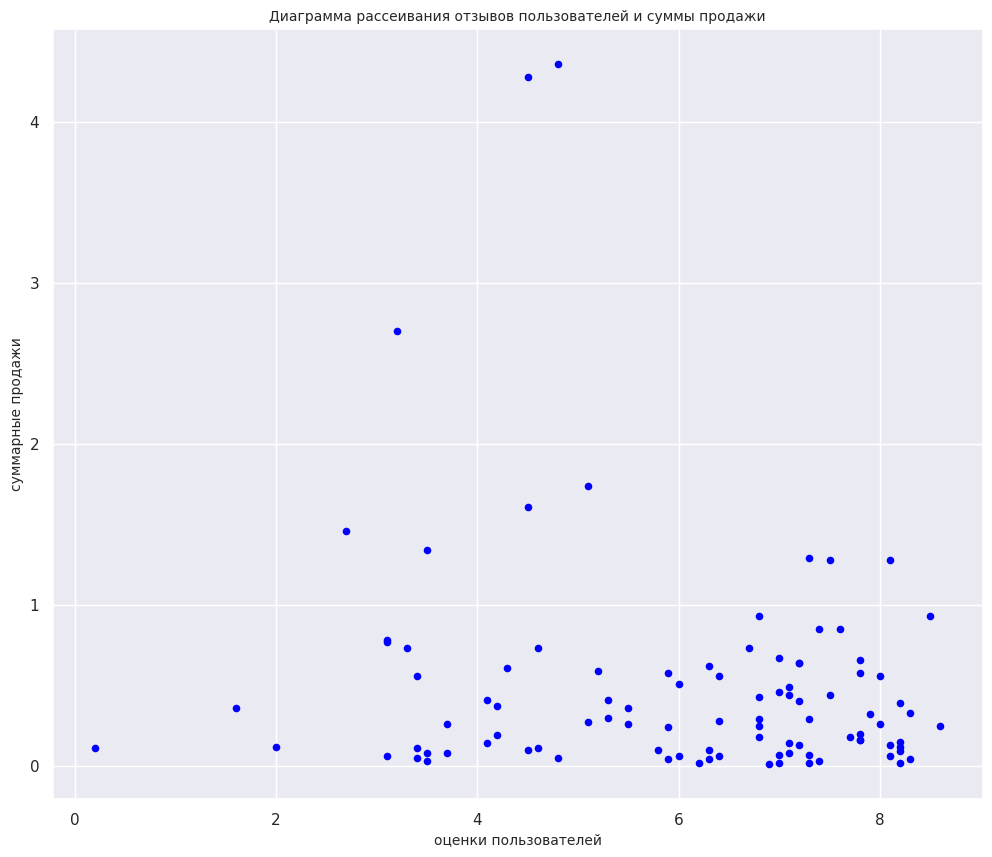

In [76]:
data_ps3.plot(x='user_score', y='sum_sales', kind='scatter', color="blue")
plt.title("Диаграмма рассеивания отзывов пользователей и суммы продажи", fontsize=10)
plt.xlabel('оценки пользователей', fontsize=10)
plt.ylabel('суммарные продажи', fontsize=10)
plt.show()

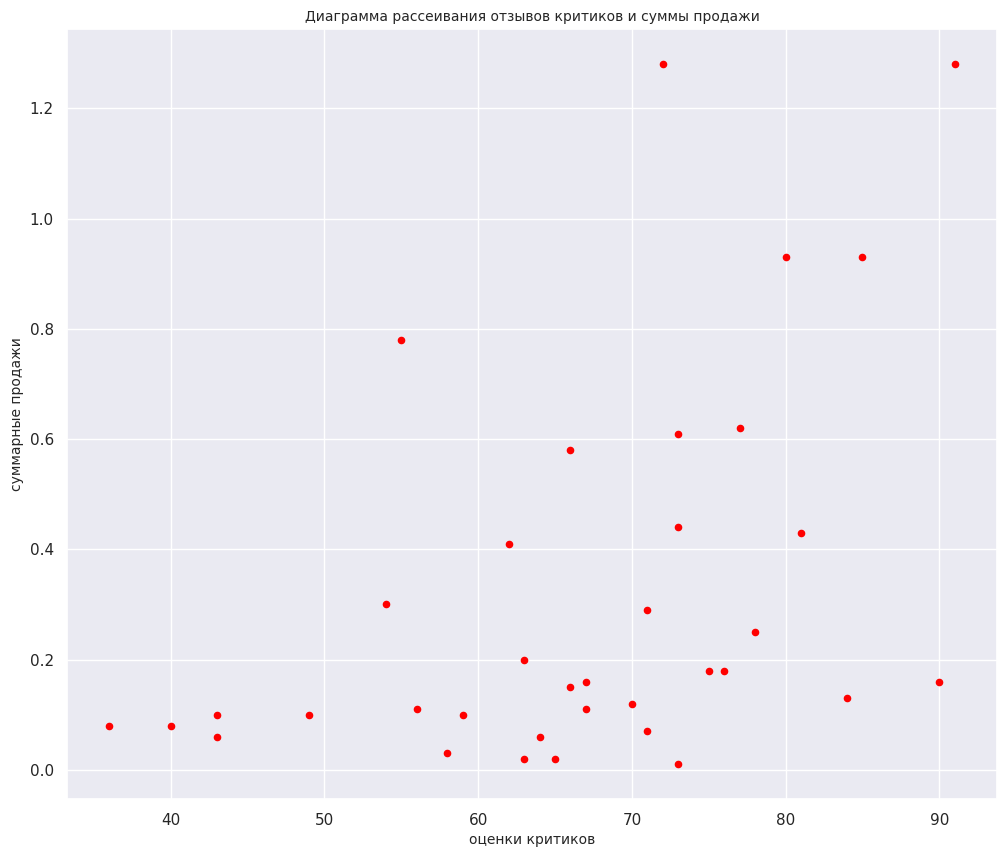

In [77]:
data_ps3.plot(x='critic_score', y='sum_sales', kind='scatter', color="red")
plt.title("Диаграмма рассеивания отзывов критиков и суммы продажи", fontsize=10)
plt.xlabel('оценки критиков', fontsize=10)
plt.ylabel('суммарные продажи', fontsize=10)
plt.show()

In [78]:
print('Коэффициент корреляции для критиков:', data_ps3['critic_score'].corr(data_ps3['sum_sales']))
print('Коэффициент корреляции для пользователей:', data_ps3['user_score'].corr(data_ps3['sum_sales'])) 

Коэффициент корреляции для критиков: 0.44657460493190704
Коэффициент корреляции для пользователей: -0.16676141347662118


<div class="alert alert-info">
Для "PS3" коэфициент корреляции критиков примерно такой же как и у предыдущей платформы - она есть, но не всегда, то есть высокие оценки критиков не приводят к значительному увеличению продаж. Точно также обстоит и с пользователеями, по крайней мере в нашей выборке. Четкой зависимости не прослеживается.
  
Так же игры в топе для этой платформы отличаются от предыдущей - виной тому экслюзивы, устаревшие технологии конкретной платформы и в целом количество компаний, выпускающих продукт для этой платформы.
  
Посмотрим на оставшуюся платформу.

In [79]:
data_xone = current_data[current_data['platform'] == 'XOne']
data_xone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 99 to 16400
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            228 non-null    int64  
 1   name             228 non-null    object 
 2   platform         228 non-null    object 
 3   year_of_release  228 non-null    int64  
 4   genre            228 non-null    object 
 5   na_sales         228 non-null    float64
 6   eu_sales         228 non-null    float64
 7   jp_sales         228 non-null    float64
 8   sum_sales        228 non-null    float64
 9   other_sales      228 non-null    float64
 10  critic_score     155 non-null    float64
 11  user_score       165 non-null    float64
 12  rating           228 non-null    object 
dtypes: float64(7), int64(2), object(4)
memory usage: 24.9+ KB


<div class="alert alert-info">
Выведем топ 10 игр по продажам.

In [80]:
data_xone.pivot_table(
    index=['name', 'critic_score', 'user_score'],
    values='sum_sales',
    aggfunc='sum'
).reset_index(
).sort_values(
    by='sum_sales',
    ascending=False
).head(10)

,name,critic_score,user_score,sum_sales
51,Grand Theft Auto V,97.0,7.9,5.47
17,Call of Duty: Advanced Warfare,81.0,5.4,5.26
53,Halo 5: Guardians,84.0,6.4,4.49
41,Fallout 4,88.0,6.2,4.22
5,Assassin's Creed: Unity,72.0,4.1,3.50
24,Destiny,75.0,5.5,3.37
49,Gears of War: Ultimate Edition,82.0,7.5,3.28
39,FIFA 16,84.0,4.4,3.25
54,Halo: The Master Chief Collection,85.0,7.2,3.23
130,Titanfall,86.0,6.4,2.95


<div class="alert alert-info">
Топ 10 игр по оценкам критиков.

In [81]:
data_xone.pivot_table(
    index=['name', 'critic_score', 'user_score'],
    values='sum_sales',
    aggfunc='sum'
).reset_index(
).sort_values(
    by='critic_score',
    ascending=False
).head(10)

,name,critic_score,user_score,sum_sales
51,Grand Theft Auto V,97.0,7.9,5.47
74,Metal Gear Solid V: The Phantom Pain,95.0,7.3,0.75
129,The Witcher 3: Wild Hunt,91.0,9.2,1.30
46,Forza Horizon 3,91.0,7.4,1.08
102,Rayman Legends,91.0,7.9,0.34
90,Overwatch,91.0,5.6,1.06
82,NBA 2K17,90.0,6.2,1.03
25,Destiny: The Taken King,89.0,5.2,1.20
41,Fallout 4,88.0,6.2,4.22
28,Dishonored 2,88.0,6.8,0.22


<div class="alert alert-info">
Топ 10 игр по оценкам пользователей.

In [82]:
data_xone.pivot_table(
    index=['name', 'critic_score', 'user_score'],
    values='sum_sales',
    aggfunc='sum'
).reset_index(
).sort_values(
    by='user_score',
    ascending=False
).head(10)

,name,critic_score,user_score,sum_sales
129,The Witcher 3: Wild Hunt,91.0,9.2,1.30
16,Brothers: A Tale of Two Sons,81.0,8.9,0.04
67,Life is Strange,85.0,8.7,0.13
21,Dark Souls III,87.0,8.6,0.39
88,Naruto Shippuden: Ultimate Ninja Storm 4,81.0,8.5,0.31
124,The Elder Scrolls Online,77.0,8.4,1.28
135,Toy Soldiers: War Chest,60.0,8.4,0.06
12,BioShock The Collection,84.0,8.3,0.15
113,Shape Up,58.0,8.3,0.18
109,Rocket League,87.0,8.3,0.24


<div class="alert alert-info">
Далее построим диаграму рассеяния и посчитаем корреляцию между отзывами и продажами. Для удоства и наглядности построим отдельно для юзверей и критиков.

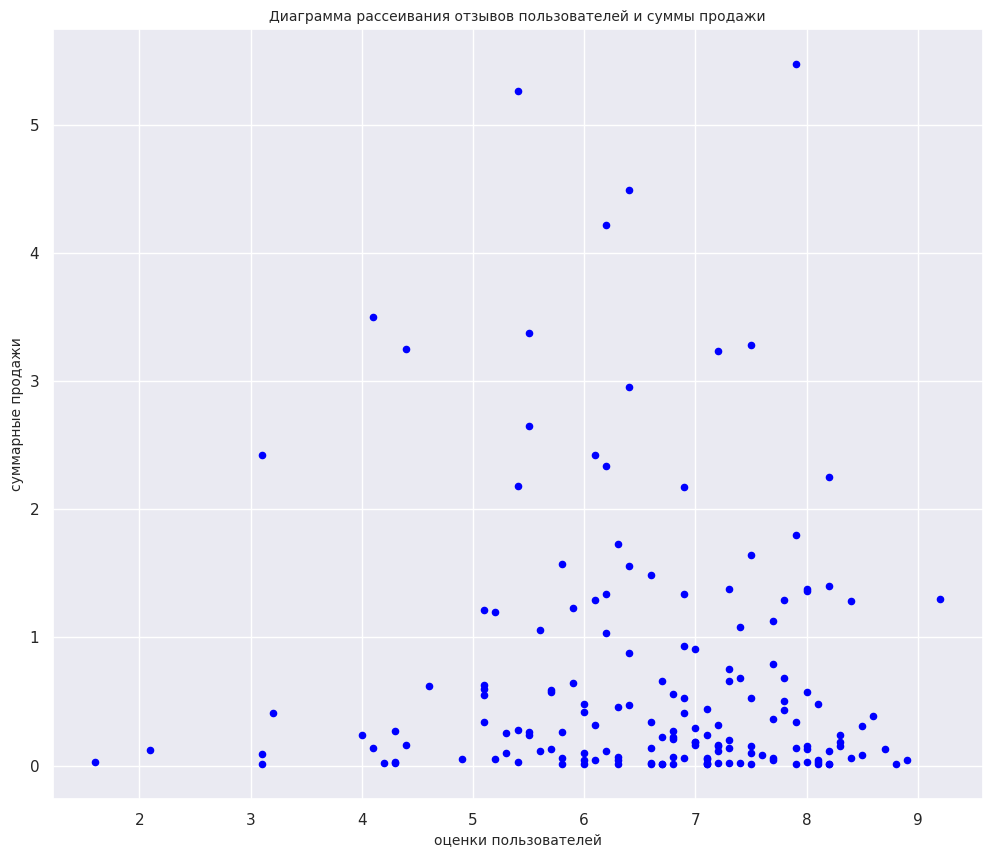

In [83]:
data_xone.plot(x='user_score', y='sum_sales', kind='scatter', color='blue')
plt.title("Диаграмма рассеивания отзывов пользователей и суммы продажи", fontsize=10)
plt.xlabel('оценки пользователей', fontsize=10)
plt.ylabel('суммарные продажи', fontsize=10)
plt.show()

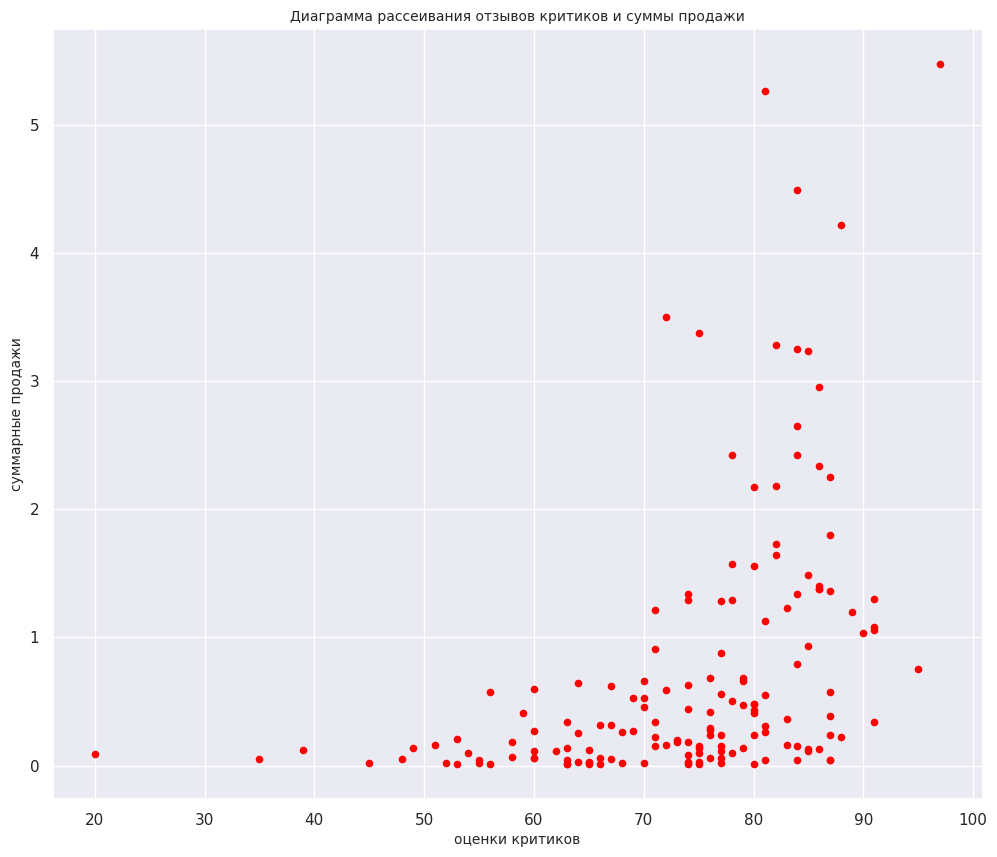

In [84]:
data_xone.plot(x='critic_score', y='sum_sales', kind='scatter', color='red')
plt.title("Диаграмма рассеивания отзывов критиков и суммы продажи", fontsize=10)
plt.xlabel('оценки критиков', fontsize=10)
plt.ylabel('суммарные продажи', fontsize=10)
plt.show()

In [85]:
print('Коэффициент корреляции для критиков:', data_xone['critic_score'].corr(data_xone['sum_sales']))
print('Коэффициент корреляции для пользователей:', data_xone['user_score'].corr(data_xone['sum_sales'])) 

Коэффициент корреляции для критиков: 0.42867694370333226
Коэффициент корреляции для пользователей: -0.0703839280647581


<div class="alert alert-info">
Аналогично двум предыдущим платформам чёткой связи между отзывами критиков и игроков с количеством продаж не наблюдается.
  
Проведенное исследование по нескольким конкурирующим платформам позволяет сделать общий вывод об отсутсвии линейной связи между отзывами и продажами.

### <font color='#22a9eb'> Распределение игр по жанрам

Проанализируем распределение игр по жанрам.

In [86]:
current_data['genre'].value_counts()

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: count, dtype: int64

In [87]:
current_data.pivot_table(
    index='genre',
    values='sum_sales',
    aggfunc=('sum', 'median', 'count')
).reset_index(
).sort_values(
    by='sum',
    ascending=False
).head(10)

,genre,count,median,sum
0,Action,619,0.090,199.36
8,Shooter,128,0.515,170.94
10,Sports,161,0.180,109.48
7,Role-Playing,221,0.110,101.44
3,Misc,113,0.090,37.55
2,Fighting,60,0.125,28.22
6,Racing,69,0.090,27.52
4,Platform,38,0.140,18.09
1,Adventure,185,0.030,17.55
9,Simulation,44,0.100,13.13


Топ выпускаемых игр практически совпадает с топом игр по продажам. Преимущество отдается "акивным жанрам", то есть много всяких действий, спец.эффектов. Однако не забывают и про жанр спорта, который уверенно занимает свою нишу, как по количеству выпускаемых игра, так и по количеству проданных копий. Несмотря на то, что жанр приключений по количеству игр занимает третьюстрочку, то по проданным копиям занимает последнюю. Можно предположить, что в данном случае игры подобного жанра не снискали популярность. Возможно, в этот период у пользователей было перенасыщение игр такого жанра.

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />        
Стоит проанализировать прибыльность жанров на диаграмме размаха, сравнить медианные продажи на каждом жанре и проверить какая из них более стабильна и имеет более длинный ряд успешно продающихся игр
        
График нарисовать __в двух масштабах с выбросами и без__ (чтобы было видно 0.75-квантиль)

In [88]:
current_data[current_data['sum_sales'] == 0.09]['genre'].count()

36

<div class="alert alert-info">
О, теперь понятно когда лучше использовать диаграмы размаха.
  
Построим диаграму размаха.

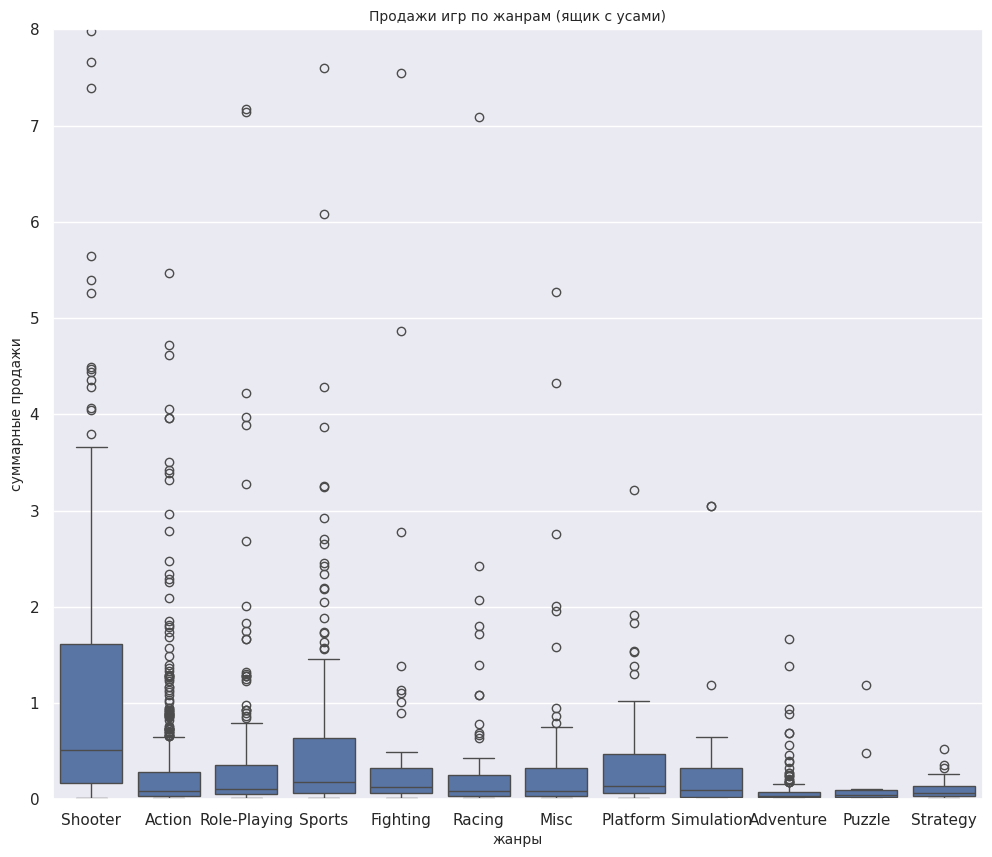

In [89]:
sns.boxplot(x='genre', y='sum_sales', data=current_data)
sns.set(rc={'figure.figsize':(15,10)})

plt.ylim(0, 8)
plt.title("Продажи игр по жанрам (ящик с усами)", fontsize=10)
plt.xlabel('жанры', fontsize=10)
plt.ylabel('суммарные продажи', fontsize=10)
plt.show()

<div class="alert alert-info">
По выбросам можно предположить, что жанры "Action", "Shooter", "Sports" обладают большим количеством выбросом и теоретически могут дать высокую прибыль.

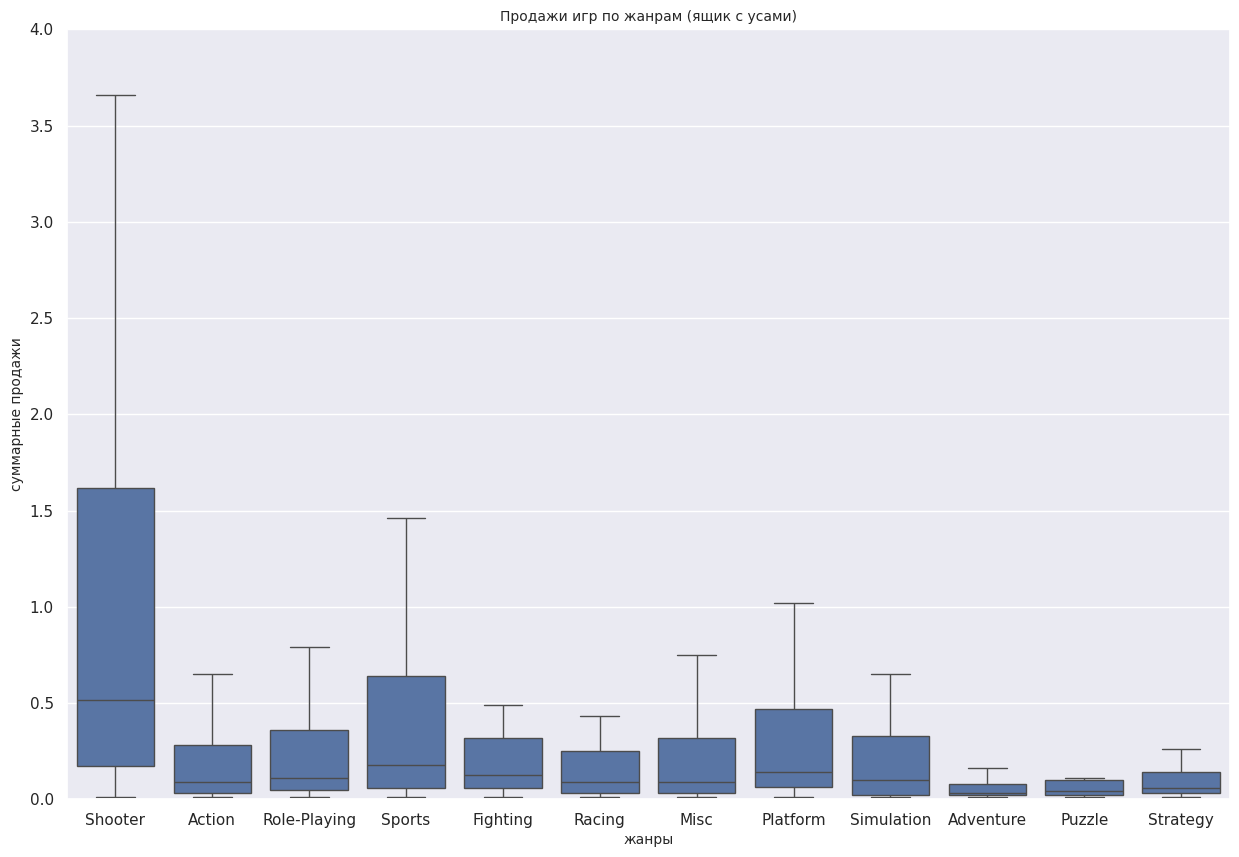

In [90]:
sns.boxplot(x='genre', y='sum_sales', data=current_data, showfliers=False)
sns.set(rc={'figure.figsize':(15,10)})

plt.ylim(0, 4)
plt.title("Продажи игр по жанрам (ящик с усами)", fontsize=10)
plt.xlabel('жанры', fontsize=10)
plt.ylabel('суммарные продажи', fontsize=10)
plt.show()

<div class="alert alert-info">
Явно по распределению продаж лидирует жанр шутеров, затем выделяется жанра спортивных игр, затем платформеров и где-то там притаился экшон. Если я правильно понял логику ящика, то стабильнее по количеству продаж выпустить игру жанра шутера, спортивную или платформер. Скорее всего они продадуться в большем количестве.
  
Проверим медианные значения продаж различных жанров.

In [91]:
current_data.pivot_table(
    index='genre',
    values='sum_sales',
    aggfunc='median'
).reset_index(
).sort_values(
    by='sum_sales',
    ascending=False
).head(10)

,genre,sum_sales
8,Shooter,0.515
10,Sports,0.180
4,Platform,0.140
2,Fighting,0.125
7,Role-Playing,0.110
9,Simulation,0.100
0,Action,0.090
3,Misc,0.090
6,Racing,0.090
11,Strategy,0.060


<div class="alert alert-info">
По медианным продажам так же лидирует жанр шутеров, но на втором месте уже спортивных жанр, затем платформер, что собственно и визуализировал ящик с усами.

### <font color='#22a9eb'> Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) топ 5 популярных платформ и жанров.

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Портреты клиентов рассчитаны, молодец, значительное влияние на портрет оказывает период с 2011 г. ..., можем совершить ошибку при формировании рекомендации маркетологам
        
Стоит оформить графики раздела TOП-5:

+ выбрать актуальный период;
+ для каждого ТОП-5 - построить 3 графика рядом с помощью subplots, оптимальнее сравнивать три региона по каждому виду портрета вместе;
+ оформить "двухуровневый заголовок" - и у всех трех графиков вместе, и у каждого из трех по отдельности;
+ при анализе платформ и жанров стоит все, что не вошло в ТОП-5, объединять в категорию "другие" - так картина анализа будет более полной

        
Если столкнешься с трудностью выполнения данного пункта — присылай код, который не получился и вопрос, подумаем вместе
        
https://proproprogs.ru/modules/matplotlib-otobrazhenie-neskolkih-koordinatnyh-osey-v-odnom-okne
        
    

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> пример графиков
        
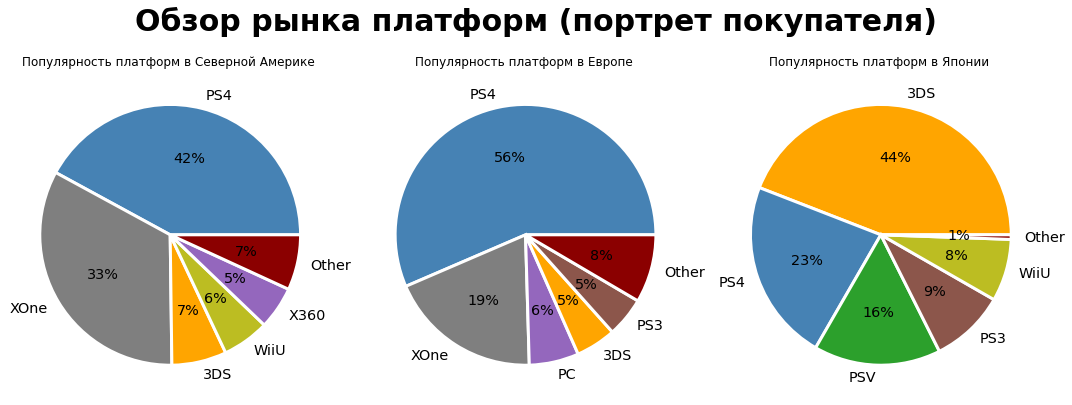        
        

__Если столкнешься с трудностью выполнения данного пункта — присылай код, который не получился и вопрос, подумаем вместе__


<div class="alert alert-info">
Согласен, ты предлагаешь просто отличное представление данных, оно сразу же провизуализирует распределение платформ для регионов и покажет какой процент используется на той или иной платформе.
  
Для удобства построения графиков определим три новые переменные с топ-5 продаж в регионе, а остальные позиции определим как "other".

In [92]:
def group_data_for_procent(dataframe, name_sales):
    """
    Вспомогательная функция для преобразования фрейма с продажами по платформам.
    Платформы не в топ-5 переименовывает в 'Other' и группирует.
    """
    sales = current_data.groupby('platform')[name_sales].sum().sort_values(ascending=False)
    sales = sales.reset_index()
    sales.loc[5:, 'platform'] = 'Other'
    sales = sales.groupby('platform')[name_sales].sum().sort_values(ascending=False)
    return round((sales/sales.sum()) * 100, 2)

na_sales = group_data_for_procent(current_data, 'na_sales')
eu_sales = group_data_for_procent(current_data, 'eu_sales')
jp_sales = group_data_for_procent(current_data, 'jp_sales')

display(na_sales, eu_sales, jp_sales)

platform
PS4      34.71
XOne     28.61
Other    10.98
X360      9.96
3DS       7.97
PS3       7.76
Name: na_sales, dtype: float64

platform
PS4      48.04
XOne     17.09
Other    12.84
PS3       9.44
PC        6.64
3DS       5.96
Name: eu_sales, dtype: float64

platform
3DS      47.52
PS4      16.13
PSV      15.62
PS3      12.05
WiiU      7.85
Other     0.82
Name: jp_sales, dtype: float64

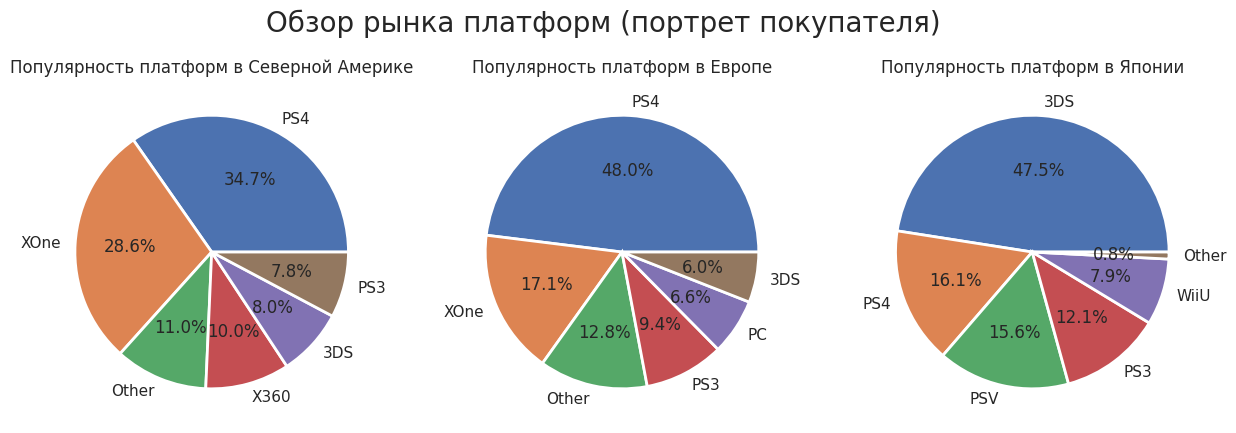

In [93]:
def draw_pie(ax, sales, title):
    """
    Рисует пирожки на переданном axes, по данным продаж и 
    добавляет заголовок на конкретный пирог.
    """
    ax.pie(
        sales,
        labels=sales.index,
        autopct='%1.1f%%',
        wedgeprops = {
            'linewidth': 2,
            'antialiased': True
        },
    )
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

draw_pie(axes[0], na_sales, 'Популярность платформ в Северной Америке')
draw_pie(axes[1], eu_sales, 'Популярность платформ в Европе')
draw_pie(axes[2], jp_sales, 'Популярность платформ в Японии')


title = fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=20)
plt.show()

<div class="alert alert-info">
В целом не сложно, по сути я воспроизвел предложенный вариант, в реальном проекте можно было добавить какие-то более яркие цвета или еще что-нибудь.  
    
По выводам: наиболее популярные платформы в Северной Америке и Европе сопадают, в Японии же лидирует "3DS". При этом в Европейском сегменте проглядывается даже ПК. В Японии же заметна пополуярность "карманных" платформ. При этом доля прочих платформ для Америки и Европы составлят более 11%, а для Японии всего 0,8%, что говорит о более широком разбросе платформ для Европейского и Американского рынка, и демонстрацию практически всего рынка платформ Японии.

In [94]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales']
for region in region_sales:
    display(current_data.groupby('genre')[region].sum().sort_values(ascending=False).head(5))

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

Возвращаясь к жанрам, для европеоидов в почете экшоны, да шутеры, затем гонки. Что скорее обсулавливается историческими фактами(по предположениям некоторых экспертов в области истории) по части военных действий, небольший территорий и завоеваний. В целом может влиять так же и стилистика популярных фильмов, а посмотреть японский медленный фильм или "Рэмбо" для европейцев приоритетнее второе, в целом. Как и отдельная любовь к споривным играм.
  
Для азиатского региона в приоритете ролевые игры, а уже потом экшон, да и спорт не особо популярен. Такой менталитет - любят гринд, чтобы красиво и что-то необычное.
  
Информация о популярных платформах и жанрах есть. Собираем свою команду и в путь!
  
Осталось еще проверить информацию о распределению игр по рейтингам.

In [95]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales']
for region in region_sales:
    display(current_data.groupby('rating')[region].sum().sort_values(ascending=False))

rating
M                 96.42
without_rating    64.72
E                 50.74
T                 38.95
E10+              33.23
Name: na_sales, dtype: float64

rating
M                 93.44
without_rating    58.95
E                 58.06
T                 34.07
E10+              26.16
Name: eu_sales, dtype: float64

rating
without_rating    56.90
T                 14.78
E                  8.94
M                  8.01
E10+               4.46
Name: jp_sales, dtype: float64

~~Для европейцев заметно, что приоритет отдается рейтингу "М", то есть "от 17 лет", затем для всех и потом ужде для подростков. Что объясняется покупательской способностью - игры может купить взрослый для себя, либо что-то вроде семейного аккаунта, в том числе детям, и только потом уже подростки(нашли куда тратить деньги) спускают свои накопленные финансы на развлечения.~~
  
~~Зная, что у японцев очень популярны иговые автоматы, то размещать что-то из разряда "М" не совсем возможно и выгодно. Поэтому явно преобладает рейтинг для всех. Но по разным заведениям взрослые ходят реже ввиду своей загруженности, поэтому во вторую очередь ориентируемся на подростков, и только потом на взрослых.~~
  
~~Хотим делать кровавое месиво? Забудь про восток, ориентируемся на запад. Поэтому определенный рейтинг, как и жанры, как и вид платформы в совокупности влияют на продажи в разных регионах.~~

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br />  
    <font size="3", color = "black">
<br />
При твоем способе подсчета игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах
        
Стоит поработать со столбцом рейтингов, заменить пропуски, посмотреть на частотность использования всех категорий рейтинга

<div class="alert alert-info">
Для удобства анализа выведем долю рейтингов об общего количества в каждом регионе.

In [96]:
reg_na_sales = current_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
reg_na_sales = round(reg_na_sales * 100/reg_na_sales.sum(), 2)

reg_eu_sales = current_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
reg_eu_sales = round(reg_eu_sales * 100/reg_eu_sales.sum(), 2)

reg_jp_sales = current_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
reg_jp_sales = round(reg_jp_sales * 100/reg_jp_sales.sum(), 2)
display(reg_na_sales, reg_eu_sales, reg_jp_sales)

rating
M                 33.94
without_rating    22.78
E                 17.86
T                 13.71
E10+              11.70
Name: na_sales, dtype: float64

rating
M                 34.52
without_rating    21.78
E                 21.45
T                 12.59
E10+               9.66
Name: eu_sales, dtype: float64

rating
without_rating    61.12
T                 15.88
E                  9.60
M                  8.60
E10+               4.79
Name: jp_sales, dtype: float64

<div class="alert alert-info">
Анализируя распределение рейтинга по сле замены пропусков и использования всех категорий, видим уже совсем другую картину. Достаточно большую долю игр занимают именно игры без рейтинга. Для европеиодного рынка игры без рейтинга прочно занимают второе место, на первом месте игры категории "M", а само распределение рейтингов практически одинаково. Для Японского потребителя наиболее продаваемы игры без рейтинга и в значительной степени, на втором месте игры "для подростков". Ориентироваться на рейтинг можно, но не стоит считать его панацеей.

## <font color='#22a9eb'> Общий вывод

Подводя итог проведенному анализу, можно отметить следующее:
- в первую очередь ориентируемся на регион рынка. Нужно понять для какого региона мы бы хотели сделать игру;
- определившись с регионом следует выбрать платформу и жанр, который мы бы хотели создавать;
- определившись с платформой и жанром, следует уже обратить внимание на будущий возрастной рейтинг нашей игры.
  
Поскольу все эти факторы в совокупности оказывают влияние на финальное количество продаж и нашей прибыли с проекта. При этом не стоит ориентироваться на мнения игровых критиков или же пользователей, а больше стараться удивить рынок чем-то необычным, но при этом в привычном или более предпочитаемом жанре. Грамотный сценарист и отличная идея даже для небольшой компании может сделать вполне успешную и прибыльную игру. Если же у нас этого нет, то орриентируемся на что-то среднее. Желательно консоли серии "PS" или "Xbox" и жанра экшн с элементами шутера, можно так же выпустить проект и для пк-бояр, если мы хотим выходить на европейский рынок. И работать с портативными консолями и рпг для выхода на азиатский рынок. В среднем таким образом мы сможем выпустить либо успешный проект, либо окупить вложения в него с большей долей вероятности.

Дополню основной вывод:
- самые актуальные платформы для европейского и американского рынков это "PS4", "XOne". Для европейского рынка так же интерес представляют игры для ПК. Для японского рынка в первую очередь следует делать упор на платформу "3DS" и "PS4";
- с точки зрения жанров имеет смысл рассматривать шутеры, спортивные игры, экшоны для европейского сегмента и рпг и экшоны для японского;
- ориентироваться на пользовательские оценки или оценки критиков не стоит, поскольку прямой зависимости между продажами и оценками нет.

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
Может пригодиться  
    
   
[Визуализация](https://dfedorov.spb.ru/pandas/%D0%AD%D1%84%D1%84%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B5%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20Matplotlib.html)


[Искусство статистики](https://www.mann-ivanov-ferber.ru/books/iskusstvo-statistiki/)
        
[Постер «Графики, которые убеждают всех»](https://www.notion.so/6c5ae8ceb8b5411e907c93c9b5e6a44e)        
        
        
В помощь — как реализовать интерактивный план проекта вручную (для собственных проектов), смотри по <a href="https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704">ссылке</a>
    
пара ссылок и по разделам проекта можно будет переходить без пролистывания всего кода, особенно актуально на проектах длина которых >  10 страниц (и там где не установлен плагин TOC)   
    
Плюс    
    
    
[Подборка статей о работе с библиотеками для анализа данных на языке Python](https://dfedorov.spb.ru/pandas/)    

## Бонус

In [97]:
data_games = pd.read_csv('/home/dwpsd/Dev/ds_practicum_projects/datasets/games.csv')

In [98]:
data_games.columns = map(str.lower, data_games.columns)

In [99]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [100]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [101]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [102]:
# check
# круги + категория другие

# функция не работает на версии библиотеки pandas = 2.0 (метод .append устарел)

def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales._append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
# Цветовая гамма не подбиралась специально под платформы, кому-что попадется, 😉      
      
    labels_c=sales.platform
    colours = {'Wii':'C60', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'lightsteelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'Fuchsia', '2600':'C15', 'PSP':'C48', 
               'XOne':'LimeGreen',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

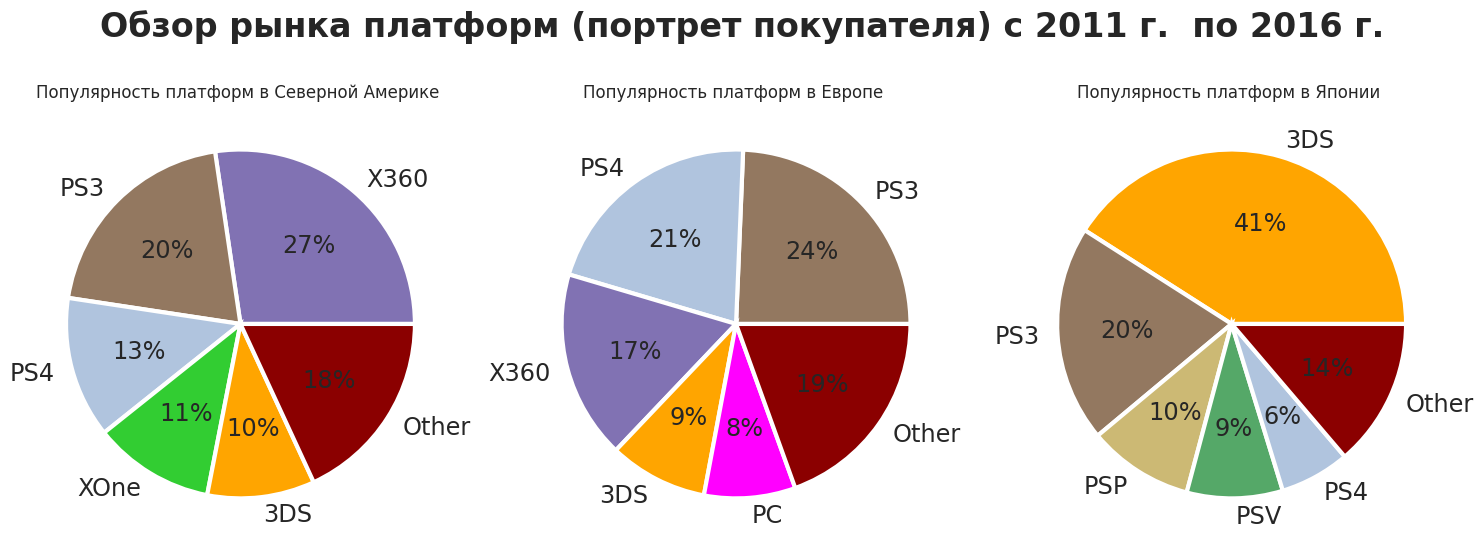

In [103]:
# check
# круги в ряд

x_year = 2011

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Оптимальный период для исследования 2014-2016 гг., т.к. данные за 2016 г. неполные

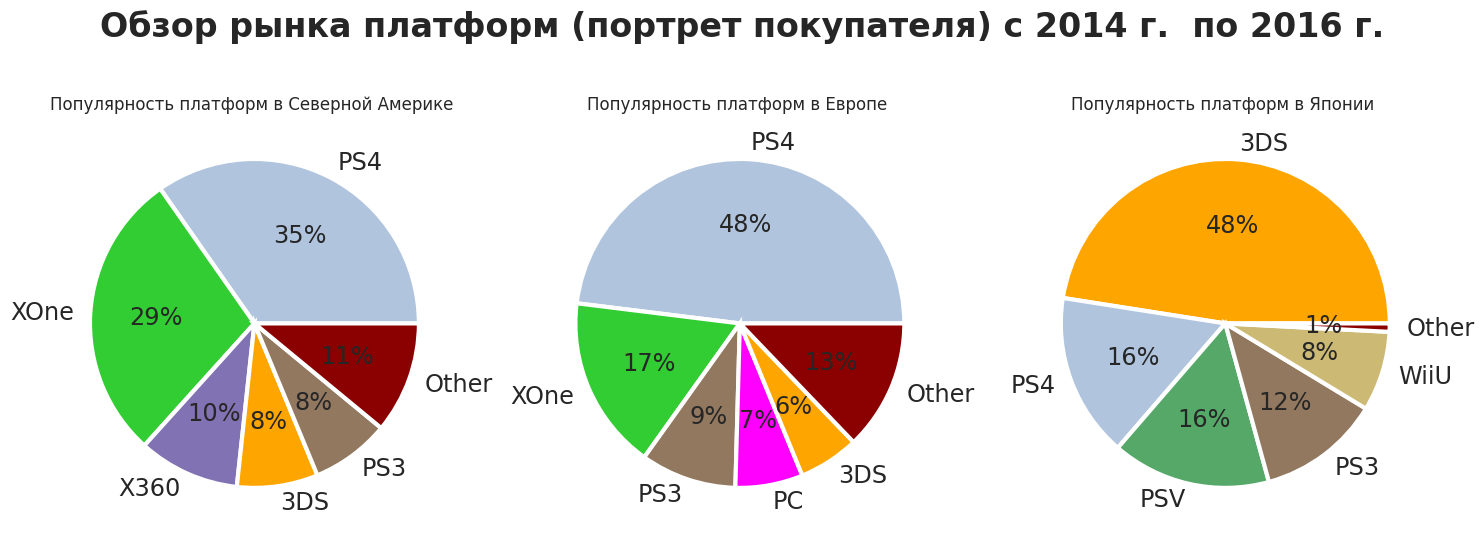

In [104]:
# check
# круги в ряд

x_year = 2014

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 2015 год взят для акцентирования на изменении доли в продажах современных платформ

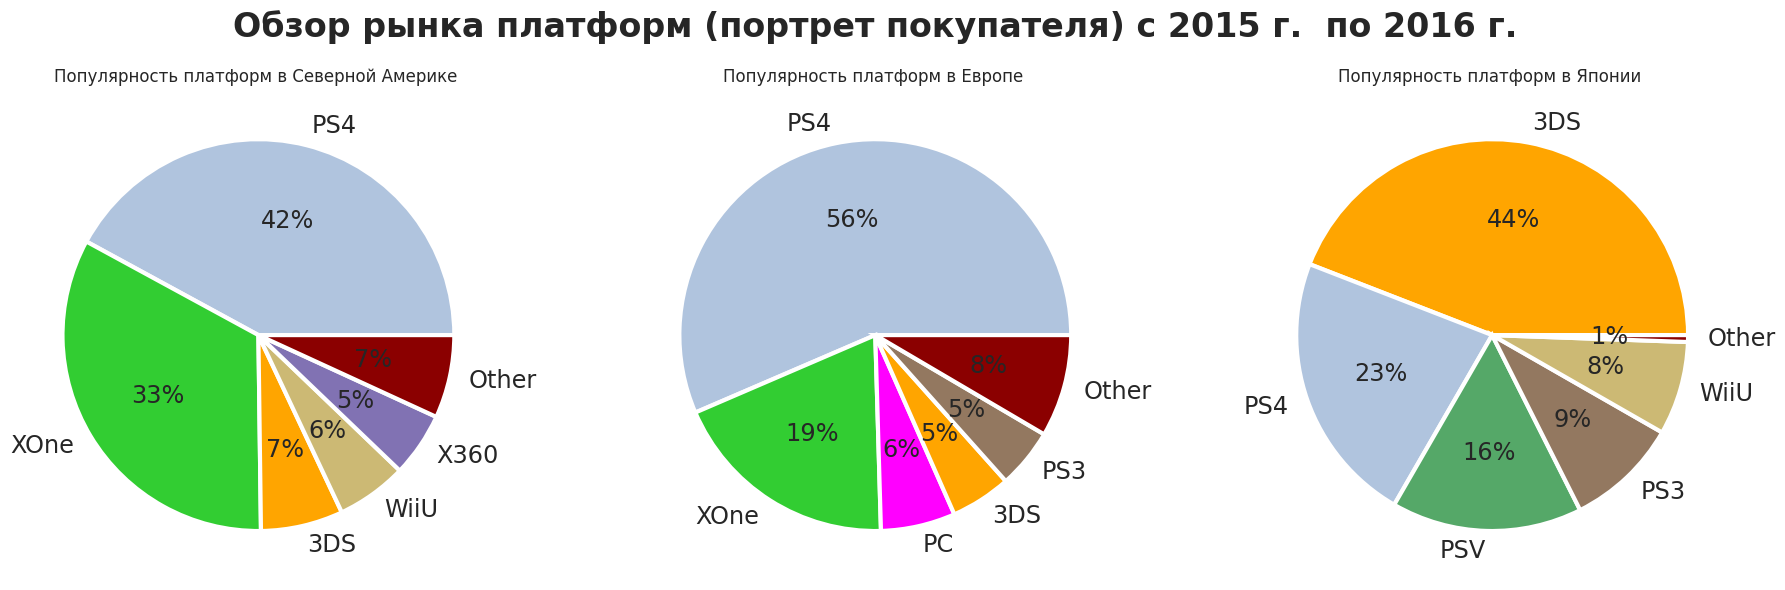

In [105]:
# check
# круги в ряд

x_year = 2015

fig, axes = plt.subplots(1, 3, figsize = (20,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

<div class="alert alert-success">   
    
#### Материалы
* [“Библиотека Matplotlib” доступна для скачивания БЕСПЛАТНО!](https://devpractice.ru/matplotlib-book/)
* [Ящики, усы и скрипки](https://habr.com/ru/articles/533726/) 
* [Исследуем отношение между переменными](https://dfedorov.spb.ru/pandas/downey/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D0%B5%D0%BC%20%D0%BE%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.html?)


</div>